In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from EOF import EOF
import datetime 

In [2]:
file  = "HSt42_0/RH80_PR0_20000day_startfrom_0day_final.dat"
ds = h5py.File(file, "r")
print(ds.keys())
# dycore = Dycore(file)
# u = dycore.getVar("grid_u_c_xyzt")
# print(u.shape)

<KeysViewHDF5 ['_types', 'convection_xyzt', 'factor1_xyzt', 'factor2_xyzt', 'factor3_xyzt', 'factor4_xyzt', 'grid_div_xyzt', 'grid_geopots_xyzt', 'grid_p_full_xyzt', 'grid_p_half_xyzt', 'grid_ps_c_xyzt', 'grid_ps_p_xyzt', 'grid_t_c_xyzt', 'grid_t_n_xyzt', 'grid_t_p_xyzt', 'grid_tracers_c_xyzt', 'grid_tracers_diff_xyzt', 'grid_tracers_n_xyzt', 'grid_tracers_p_xyzt', 'grid_u_c_xyzt', 'grid_u_n_xyzt', 'grid_u_p_xyzt', 'grid_v_c_xyzt', 'grid_v_n_xyzt', 'grid_v_p_xyzt', 'grid_vor_xyzt', 'grid_w_full_xyzt', 'grid_z_full_xyzt', 'grid_δtracers_xyzt', 'grid_δu_xyzt', 'grid_δv_xyzt', 'spe_div_c_xyzt', 'spe_div_p_xyzt', 'spe_lnps_c_xyzt', 'spe_lnps_p_xyzt', 'spe_t_c_xyzt', 'spe_t_p_xyzt', 'spe_tracers_c_xyzt', 'spe_tracers_p_xyzt', 'spe_vor_c_xyzt', 'spe_vor_p_xyzt']>


In [3]:
from Dycore import Dycore
def read_all_var(pr_start, pr_to, pr_leap, start, end, internal_day, total_file):
    total_pr = int((pr_to - pr_start) / pr_leap)
    total_day = int(total_file * internal_day)
    
    qv_shape = (total_pr, total_day, 20, 64, 128)
    qv_diff_shape = (total_pr, total_day, 20, 64, 128)
    u_shape = (total_pr, total_day, 20, 64, 128)
    v_shape = (total_pr, total_day, 20, 64, 128)
    t_shape = (total_pr, total_day, 20, 64, 128)
    p_shape = (total_pr, total_day, 20, 64, 128)
    ps_shape = (total_pr, total_day, 20, 64, 128)
    p_half_shape = (total_pr, total_day, 21, 64, 128)
    
    qv = np.zeros(qv_shape)
    qv_diff = np.zeros(qv_diff_shape)
    u = np.zeros(u_shape)
    v = np.zeros(v_shape)
    t = np.zeros(t_shape)
    p = np.zeros(p_shape)
    ps = np.zeros(ps_shape)
    p_half = np.zeros(p_half_shape)
    
    a = 0
    for pr in range(pr_start, pr_to, pr_leap):
        k = 0
        for day in range(start, end, internal_day):
            print(day)
            if pr == 8 and day == 7500:
                print("PR=8, 7500day file miss")
            else:
                file = f"HSt42_{pr}/RH80_PR{pr}_20000day_startfrom_{day}day_final.dat"
                dycore = Dycore(file)
                
                start_index = k * 100
                end_index = (k + 1) * 100
                
                qv[a, start_index:end_index, :, :, :] = dycore.qv
                qv_diff[a, start_index:end_index, :, :, :] = dycore.qv_diff
                u[a, start_index:end_index, :, :, :] = dycore.u
                v[a, start_index:end_index, :, :, :] = dycore.v
                t[a, start_index:end_index, :, :, :] = dycore.t
                ps[a, start_index:end_index, :, :, :] = dycore.ps
                p[a, start_index:end_index, :, :, :] = dycore.p
                p_half[a, start_index:end_index, :, :, :] = dycore.p_half
                k += 1
        a += 1
    return qv, qv_diff, u, v, t, p, ps, p_half

In [5]:
pr_start = 0
pr_leap = 10
pr_to = 60
total_pr = (pr_to - pr_start) / pr_leap

start = 0
end   = 20000
internal_day = 100
total_day = int((end -start)/internal_day) * internal_day

total_file = int((end - start) / internal_day)




print("done")


done


In [6]:

# with h5py.File('PR0_50_0_10000day_u.h5','w') as u_file :
#     u_file.create_dataset('u',data=u)
#     u = np.asarray(u_file["u"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_qv.h5','w') as qv_file :
#     qv_file.create_dataset('qv',data=qv)
#     # qv = np.asarray(qv_file["qv"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_qv_diff.h5','w') as qv_diff_file :
#     qv_diff_file.create_dataset('qv_diff',data=qv_diff)
#     # qv_diff = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_p.h5','w') as p_file :
#     p_file.create_dataset('p',data=p)
#     # p = np.asarray(p_file["p"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_ps.h5','w') as ps_file :
#     ps_file.create_dataset('ps',data=ps)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_p_half.h5','w') as p_half_file :
#     p_half_file.create_dataset('p_half',data=p_half)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_v.h5','w') as v_file :
#     v_file.create_dataset('v',data=v)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_t.h5','w') as t_file :
#     t_file.create_dataset('t',data=t)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_50_0_10000day_w.h5','w') as w_file :
    # w_file.create_dataset('w',data=w)
    # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# with h5py.File('PR0_50_0_10000day_z_full.h5','w') as z_full_file :
    # z_full_file.create_dataset('z_full',data=z_full)
    # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

print("done")

done


In [7]:
### read variables ###
u_file       = h5py.File("PR0_50_0_20000day_u.h5", "r")
w_file       = h5py.File("PR0_50_0_20000day_w.h5", "r")

qv_file      = h5py.File("PR0_50_0_20000day_qv.h5", "r")
qv_diff_file = h5py.File("PR0_50_0_20000day_qv_diff.h5", "r")
p_file       = h5py.File("PR0_50_0_20000day_p.h5", "r")
ps_file      = h5py.File("PR0_50_0_20000day_ps.h5", "r")
p_half_file  = h5py.File("PR0_50_0_20000day_p_half.h5", "r")

z_full_file  = h5py.File("PR0_50_0_20000day_z_full.h5", "r")



print("---1---")
u_origin       = np.asarray(u_file["u"][:,int(start):end,:,:,:])
print("---2---")
qv_diff_origin = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])
print("---3---")
p_origin       = np.asarray(p_file["p"][:,int(start):end,:,:,:])
print("---4---")
ps_origin      = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])
print("---5---")
p_half_origin  = np.asarray(p_half_file["p_half"][:,int(start):end,:,:,:])
print("---6---")

w_origin       = np.asarray(w_file["w"][:,int(start):end,:,:,:])
z_full_origin       = np.asarray(z_full_file["z_full"][:,int(start):end,:,:,:])


print("done")

u_file.close()
qv_file.close()
qv_diff_file.close()
p_file.close()
ps_file.close()
p_half_file.close()
w_file.close()
z_full_file.close()





---1---
---2---
---3---
---4---
---5---
---6---
done


In [8]:
v_file       = h5py.File("PR0_50_0_20000day_v.h5", "r")
v_origin       = np.asarray(v_file["v"][:,int(start):end,:,:,:])
t_file       = h5py.File("PR0_50_0_20000day_t.h5", "r")
t_origin       = np.asarray(t_file["t"][:,int(start):end,:,:,:])

v_file.close()
t_file.close()

print("done")

done


In [9]:
print(z_full_origin.shape)

(6, 20000, 20, 64, 128)


In [21]:
from scipy.interpolate import interp1d
sigma_mean      = np.nanmean(p_origin[0]/ps_origin[0], axis=(0,3))
sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
y               = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)

### ex z, ex theta, check plot z and theta, then cal N_square
# do ex z
from scipy import interpolate
# N_square   = np.zeros(((z_full_origin.shape[1],20,64,128)))
# t is t\bar (z)
# z = np.zeros(u.shape)
print(np.arange(-1,21))
# for i in range(1,20-1):
    # z[:,i,:,:] = Rd*np.nanmean(t[:,0:i+1,:,:], axis=1)/g * np.log(ps[:,0,:,:] / p[:,i+1,:,:])
# z[:, 0,:,:] = Rd*np.nanmean(t[:,0: 1,:,:], axis=1)/g * np.log(ps[:,0,:,:] / p[:,1,:,:])
# z[:,-1,:,:] = Rd*np.nanmean(t[:,:,:,:], axis=1)/g * np.log(ps[:,0,:,:] / p[:,-1,:,:])
##########
# Pvm      = np.nanmean(p, axis=(0,2,3))

# print(z[0])
Rd = 287
cp = 1004
theta = t_origin[0,:,:,:,:] * (ps_origin[0] / p_origin[0]) ** (Rd/cp)

z_new = np.zeros((((z_full_origin.shape[1],22,64,128))))
theta_new = np.zeros((((z_full_origin.shape[1],22,64,128))))

for i in range(z_full_origin.shape[1]):
    for j in range(64):
          for k in range(128):
            fe            = interp1d(np.linspace(0,20,20),z_full_origin[0,i,:,j,k],  fill_value='extrapolate')
            z_new[i,:,j,k] = fe(np.linspace(-1,21,22))
            fe            = interp1d(np.linspace(0,20,20),theta[i,:,j,k],  fill_value='extrapolate')
            theta_new[i,:,j,k] = fe(np.linspace(-1,21,22))
    if i % 100 == 0:
        print(f"int({i})")
print("done")

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
int(0)
done


In [2119]:
plt.figure()
plt.plot(np.arange(-1, 21), z_new[200,:,0,0], label='exterpolate')
# print(z[200,-1,0,0])
plt.plot(np.arange( 0, 20), z_full_origin[0,200,:,0,0], label='original')
plt.legend()
# plt.ylim([1,0])
# plt.colorbar()
# plt.title("N^2")
plt.title("Z and Z exterpolate")

plt.figure()
plt.plot(np.arange(-1, 21),theta_new[200,:,0,3], label='exterpolate')
plt.plot(np.arange( 0, 20),theta[200,:,0,3], label='original')
plt.legend()

plt.title("theta and theta exterpolate")

IndexError: index 200 is out of bounds for axis 0 with size 10

<Figure size 640x480 with 0 Axes>

In [2120]:
## 3/12 jobs done: complete exterpolation 
## 3/13: start with new center difference method with z_new and theta_new !

(1, 1280, 2)
hi1
hi1


Text(0.5, 1.0, 'wTEM_tempdz original')

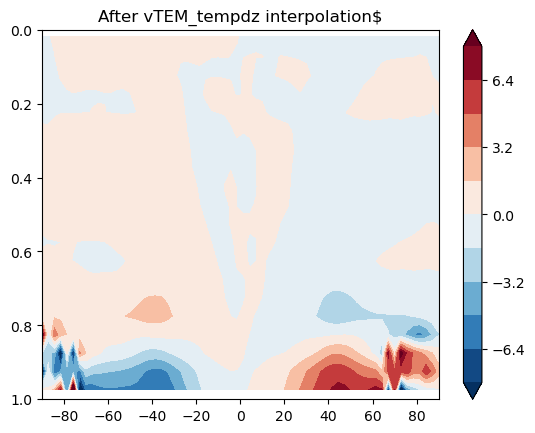

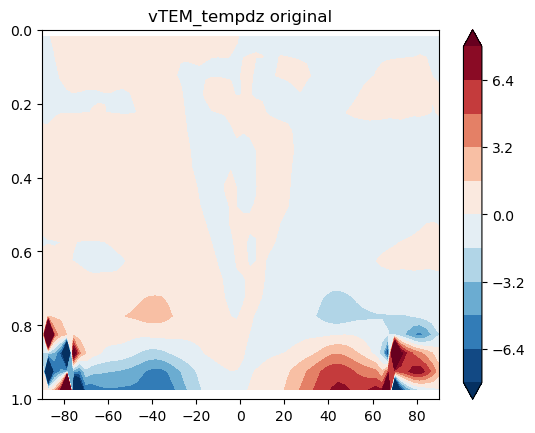

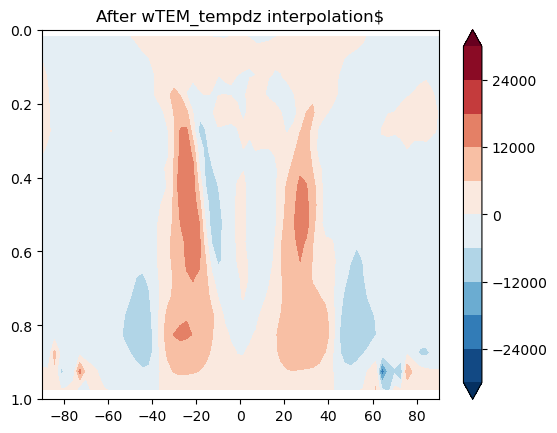

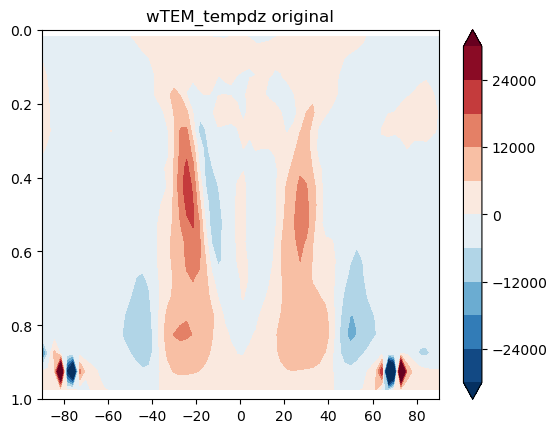

In [1904]:
print(idx.shape)
biggest = 10

# for i in range(biggest):
    # print(idx[0,i,:])

def neighbor_idx(var, length):
    
    import copy
    idx = np.dstack(np.unravel_index(np.argsort(var.ravel()), var.shape))
    
    var_new = copy.deepcopy(var)
    
    for i in range(length):
        if idx[0,i,0] <= 18 and idx[0,i,1] >=1:
            var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]-1, idx[0,i,1]] + var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]-1] + var[idx[0,i,0], idx[0,i,1]+1]) / 4 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
        
        elif idx[0,i,1] == 0:
            if var[idx[0,i,0]-1, idx[0,i,1]] < 1000 and var[idx[0,i,0]+1, idx[0,i,1]] < 1000 and var[idx[0,i,0], idx[0,i,1]+1] < 1000:
                print("hi1")
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]-1, idx[0,i,1]] + var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]+1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
            elif var[idx[0,i,0]-1, idx[0,i,1]] > 1000 and var[idx[0,i,0]+1, idx[0,i,1]] < 1000 and var[idx[0,i,0], idx[0,i,1]+1] < 1000:
                print("hi2")
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]+1]) / 2 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
            elif var[idx[0,i,0]-1, idx[0,i,1]] > 1000 and var[idx[0,i,0]+1, idx[0,i,1]] > 1000 and var[idx[0,i,0], idx[0,i,1]+1] < 1000:
                print("hi3")
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,1]+1])  # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))

            elif var[idx[0,i,0]-1, idx[0,i,1]] > 1000 and var[idx[0,i,0]+1, idx[0,i,1]] > 1000 and var[idx[0,i,0], idx[0,i,1]+1] > 1000:
                print("hi4")
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0], idx[0,i,1]+2])  # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))

            
        elif idx[0,i,1] == 63:
            var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]-1, idx[0,i,1]] + var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]-1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
        
        elif idx[0,i,0] == 0:
            var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0], idx[0,i,1]-1] + var[idx[0,i,0], idx[0,i,1]+1] + var[idx[0,i,0]+1, idx[0,i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
        

        elif idx[0,i,0] == 19:
            var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0], idx[0,i,1]-1] + var[idx[0,i,0], idx[0,i,1]+1] + var[idx[0,i,0]-1, idx[0,i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
    # ===============================================================    
    for i in range(length):
        if idx[0,-i,0] <= 18 and idx[0,-i,1] >=1:
            var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0]-1, idx[0,-i,1]] + var[idx[0,-i,0]+1, idx[0,-i,1]] + var[idx[0,-i,0], idx[0,-i,1]-1] + var[idx[0,-i,0], idx[0,-i,1]+1]) / 4 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
        
        elif idx[0,-i,1] == 0:
            var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0]-1, idx[0,-i,1]] + var[idx[0,-i,0]+1, idx[0,-i,1]] + var[idx[0,-i,0], idx[0,-i,1]+1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
        
        elif idx[0,-i,1] == 63:
            var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0]-1, idx[0,-i,1]] + var[idx[0,-i,0]+1, idx[0,-i,1]] + var[idx[0,-i,0], idx[0,-i,1]-1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            

        elif idx[0,-i,0] == 0:
            var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0], idx[0,-i,1]-1] + var[idx[0,-i,0], idx[0,-i,1]+1] + var[idx[0,-i,0]+1, idx[0,-i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            

        elif idx[0,-i,0] == 19:
            var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0], idx[0,-i,1]-1] + var[idx[0,-i,0], idx[0,-i,1]+1] + var[idx[0,-i,0]-1, idx[0,-i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
    
    return var_new

vTEM_tempdz_new   = neighbor_idx(vTEM_tempdz, biggest)
wTEM_tempdphi_new = neighbor_idx(wTEM_tempdphi, biggest)

plt.figure()
# plt.contourf(yy, sigma_mean2, np.nanmean(THETAz , axis=(0)),levels=11, cmap="RdBu_r", extend="both")
plt.contourf(yy, sigma_mean2, vTEM_tempdz_new ,levels=np.linspace(-8,8,11), cmap="RdBu_r", extend="both")


plt.ylim([1,0])
plt.colorbar()
plt.title("After vTEM_tempdz interpolation$")
# ==================================================================================================== #
plt.figure()
# plt.contourf(yy, sigma_mean2, np.nanmean(THETAz , axis=(0)),levels=11, cmap="RdBu_r", extend="both")
plt.contourf(yy, sigma_mean2, vTEM_tempdz ,levels=np.linspace(-8,8,11), cmap="RdBu_r", extend="both")


plt.ylim([1,0])
plt.colorbar()
plt.title("vTEM_tempdz original")


# ==================================================================================================== #
plt.figure()
# plt.contourf(yy, sigma_mean2, np.nanmean(THETAz , axis=(0)),levels=11, cmap="RdBu_r", extend="both")
plt.contourf(yy, sigma_mean2, wTEM_tempdphi_new ,levels=np.linspace(-30000,30000,11), cmap="RdBu_r", extend="both")


plt.ylim([1,0])
plt.colorbar()
plt.title("After wTEM_tempdz interpolation$")
# ==================================================================================================== #
plt.figure()
# plt.contourf(yy, sigma_mean2, np.nanmean(THETAz , axis=(0)),levels=11, cmap="RdBu_r", extend="both")
plt.contourf(yy, sigma_mean2, wTEM_tempdphi ,levels=np.linspace(-30000,30000,11), cmap="RdBu_r", extend="both")


plt.ylim([1,0])
plt.colorbar()
plt.title("wTEM_tempdz original")

In [2079]:
# The edition without time mean
# WARNING: ############### mean I delete the zonal mean, in order to get (500,64)
def plot_V_W_50(pr, v, omega, p, ps, t, z):
    #######################################################################
    """
    theta: (t, z, y, x)

    d theta / dz: (t, z, y, x) prop => N^2

    then 

    1. zonal mean: d theta / dz: (t, z, y)

    2. v' theta' : (t, z, y)

    3, rho: (t, z, y)

    d(1 * 2 * 3)/ dz / rho: (t, z, y)
    """
    #######################################################################
    print(v.shape)
    print(p.shape)
    
    day = v.shape[0]
    
    Rd    = 287
    cp    = 1004
    g     = 9.81
    H     = 6800
    a     = 6.37122e6

    theta = t * (ps / p)**(Rd/cp)
    print(p.shape)
    sigma = p / ps
    sigma_mean  = np.nanmean(sigma, axis=(0,3))
    sigma_onlyz = np.nanmean(sigma_mean, axis=1)
    
    # calculate rho_0 = exp(-Z/H) using Z = Hln(P0/P)
    # Z = H * np.log(np.nanmean(p0/p, axis=(0,3)))
    # Z_all     = H * np.log(p0/p)
    # rho_0     = np.zeros(v.shape)
    # rho_0_all = np.zeros(((v.shape[0],20,64))) # (day, ....)
    print("---1---")
    # for i in range(0,20):
    rho_0       = p / ps  # np.nanmean(p, axis=(0,3))[i,:] / np.nanmean(ps, axis=(0,3))[0,:] # np.exp(-Z[i,:]/H) 
    rho_0_zmtm    = np.nanmean(rho_0, axis=(0,3)) # np.nanmean(p, axis=(0,3))[i,:] / np.nanmean(ps, axis=(0,3))[0,:] # np.exp(-Z[i,:]/H) 
    
        # rho_0_all[:,i,:] = np.nanmean(p[:,i,:,:], axis=2) / np.nanmean(ps[:,0,:,:], axis=2)                  # np.exp(-Z_all[:,i,:,:]/H) 
    print("---2---")
    
    # omega  = (dycore.getVar("grid_w_full_xyzt"))
    w = - omega / rho_0 / g
    ### do dz by dz = H * ln(ps/p)
    THzm = np.nanmean(theta, axis=(3))
    THzmtm = np.nanmean(theta, axis=(0,3)) 
    
    THETAz  = np.zeros((20,64)) ############ 
    z_test = 6800 * np.log(ps/p)
    
    z_mean = np.nanmean(z_test, axis=(0,2,3))
    for i in range(1,19):
        THETAz[i,:] = (THzmtm[i+1,:] - THzmtm[i-1,:]) / (z_mean[i+1] - z_mean[i-1]) #########

    THzm_new   = np.nanmean(theta_new, axis=(3))
    THzmtm_new = np.nanmean(theta_new, axis=(0,3)) 
    z_mean_new = np.nanmean(z_new, axis=(0,2,3))
    

    THETAz[0,:]  = (THzmtm_new[2,:]  - THzmtm_new[0,:])  /  (z_mean_new[2]  - z_mean_new[0])
    THETAz[-1,:] = (THzmtm_new[-1,:] - THzmtm_new[-3,:]) /  (z_mean_new[-1] - z_mean_new[-3])
    
    THETAz[THETAz == 0] = np.nan # just in case divided by zero 
    # THETAz = np.where(THETAz.any()==0., THETAz, np.nan)
    # THETAz[THETAz < 0] = np.nan # just in case divided by zero 
    
    
    Vza = np.zeros(v.shape)
    THETAza = np.zeros(v.shape)
    Wza = np.zeros(v.shape)
    
    Vzm = np.nanmean(v, axis=3)
    THzm = np.nanmean(theta, axis=3)
    for i in range(0,128):
        Vza[:,:,:,i]     = v[:,:,:,i] - Vzm
        THETAza[:,:,:,i] = theta[:,:,:,i] - THzm
        
    VTHETA = Vza * THETAza
    VTHzm   = np.nanmean(VTHETA, axis=3)  ### mean lon
    VTHzmtm = np.nanmean(VTHzm, axis=0) ### mean time
    print("---3---")
    
    Wzm = np.nanmean(w, axis=3)
    Wzmtm = np.nanmean(Wzm, axis=0)
    Vzm = np.nanmean(v, axis=(3)) #########
    Vzmtm = np.nanmean(Vzm, axis=0)

    
    # phi
    lat   = np.linspace(-90, 90, 64)
    phi = np.broadcast_to(np.deg2rad(lat).reshape(1,64),(20,64)) # Get latitude in radians
    lat_new = np.broadcast_to(lat.reshape(1,64),(20,64)) # Get latitude in radians
    
    cphi  = np.cos(phi) 
    acphi = a * cphi
    # acphi[acphi == 0.] = np.nan

    # calculate vTEM = v - 1/rho0 d/dz(rho0 v'TH'/THz)    
    vTEM_temp = rho_0_zmtm * VTHzmtm / THETAz ############################################
    vTEM_tempdz = np.zeros((20,64))
    for i in range(1,19):
        vTEM_tempdz[i,:] = (vTEM_temp[i+1,:] - vTEM_temp[i-1,:]) /  (z_mean[i+1] - z_mean[i-1])

    vTEM_temp_new = np.zeros((22, vTEM_temp.shape[1]))
    # for i in range(vTEM_temp.shape[0]):
    for j in range(vTEM_temp.shape[1]):
            fe            = interp1d(np.linspace(0,20,20),vTEM_temp[:,j],  fill_value='extrapolate')
            vTEM_temp_new[:,j] = fe(np.linspace(-1,21,22))
        
    vTEM_tempdz[0,:]  = (vTEM_temp_new[2,:]  - vTEM_temp_new[0,:]) /  (z_mean_new[2]  - z_mean_new[0])
    vTEM_tempdz[-1,:] = (vTEM_temp_new[-1,:] - vTEM_temp_new[-3,:]) / (z_mean_new[-1] - z_mean_new[-3])

    biggest = 10
    vTEM_tempdz_smooth = neighbor_idx(vTEM_tempdz, biggest)
    
    print("---4---")
    
    vTEM1 = Vzmtm #################
    vTEM2 = (1/np.nanmean(rho_0, axis=(0,3))) * vTEM_tempdz_smooth
    vTEM  = vTEM1 - vTEM2
    # calculate wTEM = w + 1/(acosphi) d/d(phi) (cosphi v'TH'/THz)
    wTEM_temp =  cphi * VTHzmtm / THETAz ############################################
    wTEM_tempdphi = np.zeros((20,64))
    for i in range(1,63):
        wTEM_tempdphi[:,i] = (wTEM_temp[:,i+1] - wTEM_temp[:,i-1]) / (phi[:,i+1] - phi[:,i-1])

    wTEM_temp_new = np.zeros((20, 64+2))
    phi_new  = np.zeros((20, 64+2))
    phi_new2 = np.deg2rad(np.linspace(-90,90,66))
    
    
    for i in range(vTEM_temp.shape[0]):
            fe            = interp1d(np.linspace(0,64,64),wTEM_temp[i,:],  fill_value='extrapolate')
            wTEM_temp_new[i,:] = fe(np.linspace(-1,65,66))
            fe           = interp1d(np.linspace(0,64,64),phi[i,:],  fill_value='extrapolate')
            phi_new[i,:] = fe(np.linspace(-1,65,66))
        
    wTEM_tempdphi[:,0]  = (wTEM_temp_new[:,2]  - wTEM_temp_new[:,0])  / (phi_new[:,2] - phi_new[:,0])
    wTEM_tempdphi[:,-1] = (wTEM_temp_new[:,-1] - wTEM_temp_new[:,-3]) / (phi_new[:,-1] - phi_new[:,-3])

    biggest = 30
    wTEM_tempdphi_smooth = neighbor_idx(wTEM_tempdphi, biggest)
    
    print("---5---")
    
    wTEM1 = Wzmtm ##################
    acphi[acphi ==0] = np.nan
    # acphi[acphi < 0.001] = np.nan
    wTEM2 = (wTEM_tempdphi_smooth) /acphi
    wTEM2[wTEM2 < -1E5] = np.nan
    wTEM2[wTEM2 > 1E5]  = np.nan
    
    wTEM = wTEM1 + wTEM2
    print(wTEM1.shape)
    print(wTEM2.shape)
    
    return vTEM,wTEM
vTEM, wTEM = plot_V_W_50(10, v_origin[0,:], w_origin[0,:], p_origin[0,:], ps_origin[0,:], t_origin[0,:], z_full_origin[0,:])
print("over")


(10, 20, 64, 128)
(10, 20, 64, 128)
(10, 20, 64, 128)
---1---
---2---
---3---
hi1


IndexError: index 64 is out of bounds for axis 1 with size 64

In [86]:
class TEM:
    """
    Step 1. interpolation z -> z_new
    Step 2. Calculate v* and w*
    Step 3. Smooth v* and w* (there is singular point)
    Step 4. Calculate TEM streamfunction
    """

    ### Step 1. 
    def __init__(
        self, 
        input_v, 
        input_omega, 
        input_p, 
        input_ps, 
        input_t,
        input_z,
        single_day):

        Rd    = 287
        cp    = 1004
        g     = 9.81
        self.v = input_v
        self.omega = input_omega
        self.p  = input_p
        self.ps = input_ps
        self.t = input_t
        self.z = input_z
        
        # # lat, lev
        if single_day: 
            self.sigma_mean      = np.nanmean(self.p/self.ps, axis=(2))
        else:
            self.sigma_mean      = np.nanmean(self.p/self.ps, axis=(0,3))
        self.sigma_onlyz     = np.nanmean(self.sigma_mean, axis=1)
        self.y               = np.linspace(-90,90,64)
        self.yy, self.sigma_mean2 = np.meshgrid(self.y,self.sigma_onlyz)

        self.rho = self.p / self.ps
        self.w   = -self.omega / self.rho / g

        self.single_day = single_day
        # int
        if single_day: 
            # self.day = self.z.shape[0]
            self.day = int(1)
            self.lev = self.z.shape[0]
            self.lat = self.z.shape[1]
            self.lon = self.z.shape[2]
        else: 
            self.day = self.z.shape[0]
            self.lev = self.z.shape[1]
            self.lat = self.z.shape[2]
            self.lon = self.z.shape[3]


    
        # sigma = self.p / self.ps
        # sigma_mean  = np.nanmean(sigma, axis=(0,3))
        # sigma_onlyz = np.nanmean(self.sigma_mean, axis=1)

        ###
        self.theta = self.t * (self.ps / self.p)**(Rd/cp)
    

    def _interpolation(self):
        self.z_new     = np.zeros(((( self.day, int(self.lev+2), self.lat, self.lon ))))
        self.theta_new = np.zeros(((( self.day, int(self.lev+2), self.lat, self.lon ))))

        if self.single_day:
            for i in range(self.day):
                for j in range(self.lat):
                      for k in range(self.lon):
                        fe                  = interp1d(np.linspace(0,self.lev,self.lev),self.z[:,j,k],  fill_value='extrapolate')
                        self.z_new[i,:,j,k] = fe(np.linspace(-1,21,22))
                        fe                  = interp1d(np.linspace(0,self.lev,self.lev),self.theta[:,j,k],  fill_value='extrapolate')
                        self.theta_new[i,:,j,k] = fe(np.linspace(-1,21,22))
                if i % 100 == 0:
                    print(f"int({i})")
            # print("done")
        else:
            for i in range(self.day):
                for j in range(self.lat):
                      for k in range(self.lon):
                        fe                  = interp1d(np.linspace(0,self.lev,self.lev),self.z[i,:,j,k],  fill_value='extrapolate')
                        self.z_new[i,:,j,k] = fe(np.linspace(-1,21,22))
                        fe                  = interp1d(np.linspace(0,self.lev,self.lev),self.theta[i,:,j,k],  fill_value='extrapolate')
                        self.theta_new[i,:,j,k] = fe(np.linspace(-1,21,22))
                if i % 100 == 0:
                    print(f"int({i})")
            # print("done")

    # def _neighbor_idx(self):
    def _neighbor_idx(self, var, length):
        import copy
        idx = np.dstack(np.unravel_index(np.argsort(var.ravel()), var.shape))
        
        var_new = copy.deepcopy(var)
        
        for i in range(length):
            if idx[0,i,0] <= 18 and idx[0,i,0] >=1 and idx[0,i,1] <= 62 and idx[0,i,1] >=1:
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]-1, idx[0,i,1]] + var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]-1] + var[idx[0,i,0], idx[0,i,1]+1]) / 4 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
            elif idx[0,i,1] == 0:
                if var[idx[0,i,0]-1, idx[0,i,1]] < 1000 and var[idx[0,i,0]+1, idx[0,i,1]] < 1000 and var[idx[0,i,0], idx[0,i,1]+1] < 1000:
                    # print("hi1")
                    var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]-1, idx[0,i,1]] + var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]+1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
                
                elif var[idx[0,i,0]-1, idx[0,i,1]] > 1000 and var[idx[0,i,0]+1, idx[0,i,1]] < 1000 and var[idx[0,i,0], idx[0,i,1]+1] < 1000:
                    # print("hi2")
                    var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]+1]) / 2 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
                
                elif var[idx[0,i,0]-1, idx[0,i,1]] > 1000 and var[idx[0,i,0]+1, idx[0,i,1]] > 1000 and var[idx[0,i,0], idx[0,i,1]+1] < 1000:
                    # print("hi3")
                    var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,1]+1])  # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
    
                elif var[idx[0,i,0]-1, idx[0,i,1]] > 1000 and var[idx[0,i,0]+1, idx[0,i,1]] > 1000 and var[idx[0,i,0], idx[0,i,1]+1] > 1000:
                    # print("hi4")
                    var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0], idx[0,i,1]+2])  # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
    
                
            elif idx[0,i,1] == 63:
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0]-1, idx[0,i,1]] + var[idx[0,i,0]+1, idx[0,i,1]] + var[idx[0,i,0], idx[0,i,1]-1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
            elif idx[0,i,0] == 0:
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0], idx[0,i,1]-1] + var[idx[0,i,0], idx[0,i,1]+1] + var[idx[0,i,0]+1, idx[0,i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
            
    
            elif idx[0,i,0] == 19:
                var_new[idx[0,i,0], idx[0,i,1]]  = (var[idx[0,i,0], idx[0,i,1]-1] + var[idx[0,i,0], idx[0,i,1]+1] + var[idx[0,i,0]-1, idx[0,i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
        # ===============================================================    
        for i in range(length):
            if idx[0,-i,0] <= 18 and idx[0,-i,0] >=1 and idx[0,-i,1] <= 62 and idx[0,-i,1] >=1:
                var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0]-1, idx[0,-i,1]] + var[idx[0,-i,0]+1, idx[0,-i,1]] + var[idx[0,-i,0], idx[0,-i,1]-1] + var[idx[0,-i,0], idx[0,-i,1]+1]) / 4 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
                
            
            elif idx[0,-i,1] == 0:
                var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0]-1, idx[0,-i,1]] + var[idx[0,-i,0]+1, idx[0,-i,1]] + var[idx[0,-i,0], idx[0,-i,1]+1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
                
            
            elif idx[0,-i,1] == 63:
                var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0]-1, idx[0,-i,1]] + var[idx[0,-i,0]+1, idx[0,-i,1]] + var[idx[0,-i,0], idx[0,-i,1]-1]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
                
    
            elif idx[0,-i,0] == 0:
                var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0], idx[0,-i,1]-1] + var[idx[0,-i,0], idx[0,-i,1]+1] + var[idx[0,-i,0]+1, idx[0,-i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
                
    
            elif idx[0,-i,0] == 19:
                var_new[idx[0,-i,0], idx[0,-i,1]]  = (var[idx[0,-i,0], idx[0,-i,1]-1] + var[idx[0,-i,0], idx[0,-i,1]+1] + var[idx[0,-i,0]-1, idx[0,-i,1]]) / 3 # fe(np.linspace(idx[0,i,0]-1,idx[0,i,0]+1,2))
        
        return var_new
              
    def _vTEM_wTEM(self):

        g     = 9.81
        H     = 6800
        a     = 6.37122e6

        # THzm   = np.nanmean(theta, axis=(3))
        THzmtm = np.nanmean(theta, axis=(0,3)) 
        
        dTHdz  = np.zeros((20,64)) ############ 
        z_test = 6800 * np.log(self.ps/self.p)
        if self.single_day:
            z_mean = np.nanmean(self.z, axis=(1,2))
        else:
            z_mean = np.nanmean(self.z, axis=(0,2,3))
        for i in range(1,19):
            dTHdz[i,:] = (THzmtm[i+1,:] - THzmtm[i-1,:]) / (z_mean[i+1] - z_mean[i-1]) #########
    
        THzmtm_new = np.nanmean(self.theta_new, axis=(0,3)) 
        z_mean_new = np.nanmean(self.z_new, axis=(0,2,3))
        
    
        dTHdz[0,:]  = (THzmtm_new[2,:]  - THzmtm_new[0,:])  /  (z_mean_new[2]  - z_mean_new[0])
        dTHdz[-1,:] = (THzmtm_new[-1,:] - THzmtm_new[-3,:]) /  (z_mean_new[-1] - z_mean_new[-3])
        
        dTHdz[dTHdz == 0] = np.nan # just in case divided by zero 
        

        # Wza = np.zeros(self.v.shape)

        if self.single_day:
            Vza = np.zeros(self.v.shape)
            THETAza = np.zeros(self.v.shape)
            Vzm = np.nanmean(self.v, axis=2)
            THzm = np.nanmean(self.theta, axis=2)
            for i in range(0,128):
                Vza[:,:,i]     = self.v[:,:,i] - Vzm
                THETAza[:,:,i] = self.theta[:,:,i] - THzm
        else:
            Vza = np.zeros(self.v.shape)
            THETAza = np.zeros(self.v.shape)
            Vzm = np.nanmean(self.v, axis=3)
            THzm = np.nanmean(self.theta, axis=3)
            for i in range(0,128):
                Vza[:,:,:,i]     = self.v[:,:,:,i] - Vzm
                THETAza[:,:,:,i] = self.theta[:,:,:,i] - THzm
            
        VTHETA  = Vza * THETAza
        if self.single_day:
            VTHzm   = np.nanmean(VTHETA, axis=2)   ### mean lon
            VTHzmtm = VTHzm # np.nanmean(VTHzm,  axis=0)   ### mean time

            Wzm = np.nanmean(self.w, axis=2)
            self.Wzmtm = Wzm

            Vzm = np.nanmean(self.v, axis=(2)) #########
            Vzmtm = Vzm

            rho_0_zmtm = np.nanmean(self.rho, axis=(0,2))
        
        else:
            VTHzm   = np.nanmean(VTHETA, axis=3)   ### mean lon
            VTHzmtm = np.nanmean(VTHzm,  axis=0)   ### mean time

            Wzm = np.nanmean(self.w, axis=3)
            self.Wzmtm = np.nanmean(Wzm, axis=0)

            Vzm = np.nanmean(self.v, axis=(3)) #########
            Vzmtm = np.nanmean(Vzm, axis=0)

            rho_0_zmtm = np.nanmean(self.rho, axis=(0,3))
            
        # print("---3---")

        
        # Wzm = np.nanmean(self.w, axis=3)
        # Wzmtm = np.nanmean(Wzm, axis=0)
        # Vzm = np.nanmean(self.v, axis=(3)) #########
        # Vzmtm = np.nanmean(Vzm, axis=0)
        
        # phi
        phi = np.broadcast_to(np.deg2rad(y).reshape(1,64),(20,64)) # Get latitude in radians
        lat_new = np.broadcast_to(y.reshape(1,64),(20,64)) # Get latitude in radians
        
        cphi  = np.cos(phi) 
        self.acphi = a * cphi
    
        # calculate vTEM = v - 1/rho0 d/dz(rho0 v'TH'/THz)    
        vTEM_temp  = rho_0_zmtm * VTHzmtm / dTHdz ############################################
        vTEM_tempdz = np.zeros((20,64))
        for i in range(1,19):
            vTEM_tempdz[i,:] = (vTEM_temp[i+1,:] - vTEM_temp[i-1,:]) /  (z_mean[i+1] - z_mean[i-1])
    
        vTEM_temp_new = np.zeros((22, vTEM_temp.shape[1]))
        for j in range(vTEM_temp.shape[1]):
                fe            = interp1d(np.linspace(0,20,20),vTEM_temp[:,j],  fill_value='extrapolate')
                vTEM_temp_new[:,j] = fe(np.linspace(-1,21,22))
            
        vTEM_tempdz[0,:]  = (vTEM_temp_new[2,:]  - vTEM_temp_new[0,:]) /  (z_mean_new[2]  - z_mean_new[0])
        vTEM_tempdz[-1,:] = (vTEM_temp_new[-1,:] - vTEM_temp_new[-3,:]) / (z_mean_new[-1] - z_mean_new[-3])
    
        biggest = 10
        vTEM_tempdz_smooth = self._neighbor_idx(vTEM_tempdz, biggest)
        
        # print("---4---")
        if self.single_day:
            vTEM1 = np.nanmean(self.v, axis=(0,2)) # Vzmtm 
            # print(self.rho)
            vTEM2 = (1/np.nanmean(self.rho, axis=(0,2))) * vTEM_tempdz_smooth
        else:
            vTEM1 = np.nanmean(self.v, axis=(0,3)) # Vzmtm 
            vTEM2 = (1/np.nanmean(self.rho, axis=(0,3))) * vTEM_tempdz_smooth
        vTEM  = vTEM1 - vTEM2
        #######################################################################################################
        # calculate wTEM = w + 1/(acosphi) d/d(phi) (cosphi v'TH'/THz)
        wTEM_temp =  cphi * VTHzmtm / dTHdz
        wTEM_tempdphi = np.zeros((20,64))
        for i in range(1,63):
            wTEM_tempdphi[:,i] = (wTEM_temp[:,i+1] - wTEM_temp[:,i-1]) / (phi[:,i+1] - phi[:,i-1])
    
        wTEM_temp_new = np.zeros((20, 64+2))
        phi_new  = np.zeros((20, 64+2))
        phi_new2 = np.deg2rad(np.linspace(-90,90,66))
        
        for i in range(vTEM_temp.shape[0]):
                fe            = interp1d(np.linspace(0,self.lat,self.lat),wTEM_temp[i,:],  fill_value='extrapolate')
                wTEM_temp_new[i,:] = fe(np.linspace(-1,65,66))
                fe           = interp1d(np.linspace(0,64,64),phi[i,:],  fill_value='extrapolate')
                phi_new[i,:] = fe(np.linspace(-1,65,66))
            
        wTEM_tempdphi[:,0]  = (wTEM_temp_new[:,2]  - wTEM_temp_new[:,0])  / (phi_new[:,2] - phi_new[:,0])
        wTEM_tempdphi[:,-1] = (wTEM_temp_new[:,-1] - wTEM_temp_new[:,-3]) / (phi_new[:,-1] - phi_new[:,-3])
    
        biggest = 30
        wTEM_tempdphi_smooth = self._neighbor_idx(wTEM_tempdphi, biggest)
        
        # print("---5---")
        
        wTEM1 = self.Wzmtm ##################
        self.acphi[self.acphi ==0] = np.nan
        # acphi[acphi < 0.001] = np.nan
        wTEM2 = (wTEM_tempdphi_smooth) / self.acphi
        wTEM2[wTEM2 < -1E5] = np.nan
        wTEM2[wTEM2 > 1E5]  = np.nan
        
        wTEM = wTEM1 + wTEM2
        
        return vTEM, wTEM

    def _plot_vTEM_wTEM(self, vTEM, wTEM):
        fig, ax = plt.subplots(2, figsize=(8,6), dpi=100.)
        CS = ax[0].contourf(self.yy, self.sigma_mean2, wTEM, levels=np.linspace(-0.005,0.005,11), cmap="RdBu_r", extend="both")
        plt.colorbar(CS, ax=ax[0])
        ax[0].set_ylim([1,0])
        ax[0].set_title("$w^*$")
        # plt.show()
        
        # plt.figure()
        CS = ax[1].contourf(yy, sigma_mean2, vTEM, levels=21, cmap="RdBu_r", extend="both")
        plt.colorbar(CS, ax=ax[1])
        ax[1].set_ylim([1,0])
        ax[1].set_title("$v^*$")
        plt.show()

    def _cal_psi(self, vTEM):
        psi_w1 = self.Wzmtm #np.nanmean(w , axis=(0,3))
        psi_w2 = self.Wzmtm #np.nanmean(w , axis=(0,3))
        """
        psi_w1[:,0] = 0
        for ilat in range(1,63):        
            dlat = phi[:,ilat] - phi[:,ilat-1]       
            psi_w1[:,ilat] =  psi_w1[:,ilat-1] + (dlat * rho_0_mean[:,ilat] * acphi[:,ilat] * wTEM[:,ilat])
    
        psi_w2[:,64-1] = 0
        for jlat in range(1,64-1):        
            ilat = 64 - 1 - jlat
            dlat = phi[:,ilat] - phi[:,ilat+1]           
            psi_w2[:,ilat] =  psi_w2[:,ilat+1] + (dlat * rho_0_mean[:,ilat] * acphi[:,ilat] * wTEM[:,ilat])
        psi_w = 0.5*(psi_w1 + psi_w2)
        
        
        """
        p_mean = np.nanmean(p_origin[0], axis=(0,3)) 
        psi_w1[0,:] = 0
        g = 9.81
        for ilev in range(1,19):        
            dlev = p_mean[ilev+1,:] - p_mean[ilev-1,:]       
            psi_w1[ilev,:] =  psi_w1[ilev-1,:] - 2*np.pi/g*self.acphi[ilev,:] * (dlev  * vTEM[ilev,:])
        psi_w = psi_w1
        return psi_w

    def _plot_psi(self, psi_w):
        fig, ax = plt.subplots(2, figsize=(10,8), dpi=150.)
        CS = ax[0].contour(yy,sigma_mean2, psi_w / 10**9, levels=21, colors='k') # 
        plt.clabel(CS, fontsize=8)
        ax[0].set_ylim([1,0])
        ax[0].set_title("TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)", fontsize=16)
        # plt.show()
        
        # plt.figure(figsize=(8,6), dpi=100.)
        CS = ax[1].contourf(yy,sigma_mean2, psi_w , levels=21, cmap="RdBu_r", extend="both") #         
        plt.colorbar(CS, ax=ax[1], fraction=0.046, pad=0.04)
        ax[1].set_ylim([1,0])
        ax[1].set_title("TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)", fontsize=16)
        
        plt.show()
        
    def get(self):
        self._interpolation()
        vTEM, wTEM = self._vTEM_wTEM()
        # self._plot_vTEM_wTEM(vTEM, wTEM)
        psi_w = self._cal_psi(vTEM)
        # self._plot_psi(psi_w)
        
        return vTEM, wTEM, psi_w

In [87]:
from Dycore import Dycore


0
1
2
3
4
5


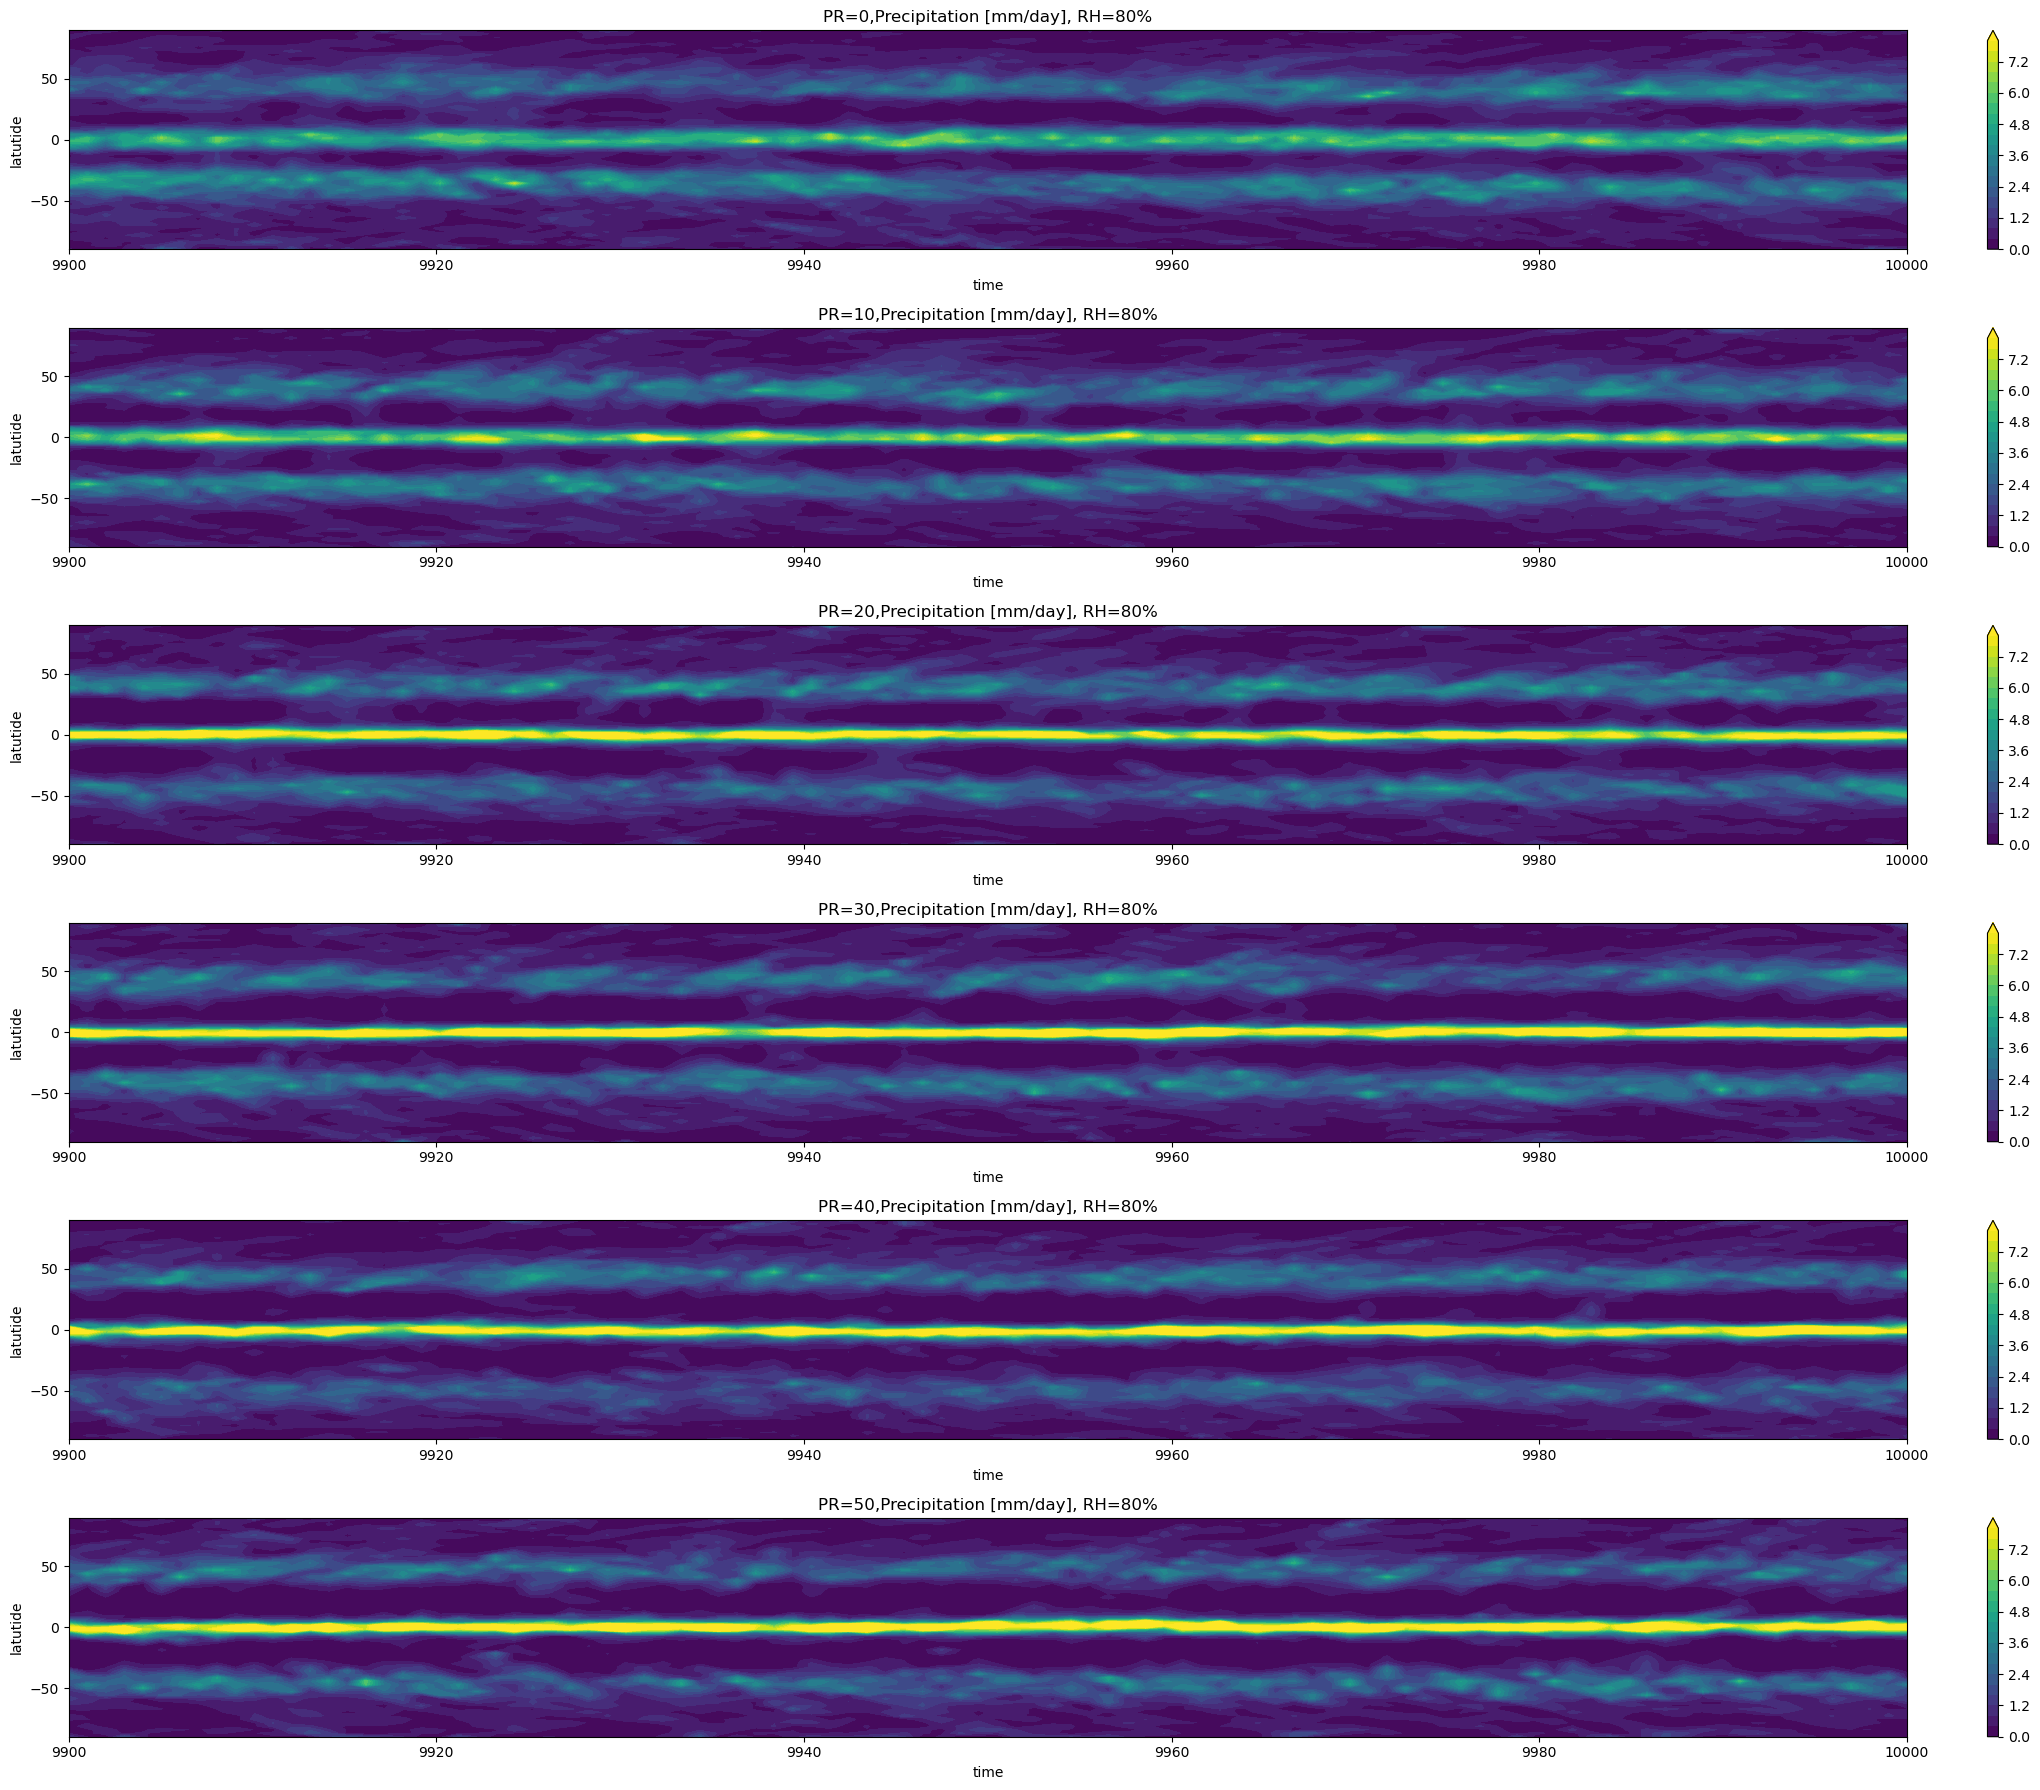

In [88]:
file  = "HSt42_10_10000day/RH80_PR10_10000day_startfrom_0day_final.dat"

dycore = Dycore(file)
### fig
y = np.linspace(-90,90,64)
total_day = int(total_file*internal_day)
time = np.linspace(start, end, total_day)


yy, tt = np.meshgrid(y,time)
fig,ax   = plt.subplots(int((pr_to - pr_start)/pr_leap),figsize=(21,18))

do_check_qv = True
do_check_KE = False
do_check_t  = False

test = np.zeros(((int((pr_to - pr_start)/pr_leap), tt.shape[0], tt.shape[1])))
a = 0           
Prec_all = np.zeros(p_origin.shape)
for pr in range(pr_start, pr_to, pr_leap):
    if do_check_qv:
        print(a)
        Prec_new, Prec_fulldim   = dycore.cal_pre(qv_diff_origin[a], p_half_origin[a])
        CS = ax[a].contourf(tt, yy, Prec_new[:,:] * 86400,levels=np.linspace(0,8,21), extend="max")    
        fig.colorbar(CS, orientation='vertical',fraction=0.046, pad=0.04, ax=ax[a])
        ax[a].set_title(f"PR={pr},Precipitation [mm/day], RH=80%")    
        ax[a].set_xlabel("time")
        ax[a].set_ylabel("latutide")
        test[a] = Prec_new
        Prec_all[a] = Prec_fulldim
        a += 1

if do_check_qv:
    fig.tight_layout()
    # plt.savefig("check_qv_equilibrium.png", dpi=300., bbox_inches='tight')
    plt.show()

In [89]:
print(yy.shape)

(100, 64)


In [90]:
vTEM_all  = np.zeros(((z_full_origin.shape[1], 20, 64)))
wTEM_all  = np.zeros(((z_full_origin.shape[1], 20, 64)))
psi_w_all = np.zeros(((z_full_origin.shape[1], 20, 64)))
print(ps_origin.shape)
for i in range(z_full_origin.shape[1]):
    tem = TEM(v_origin[0,i], w_origin[0,i], p_origin[0,i], ps_origin[0,i], t_origin[0,i], z_full_origin[0,i], True)
    # tem = TEM(v_origin[0,:], w_origin[0,:], p_origin[0,:], ps_origin[0,:], t_origin[0,:], z_full_origin[0,:], False)
    vTEM, wTEM, psi_w = tem.get()
    vTEM_all[i], wTEM_all[i], psi_w_all[i] = vTEM, wTEM, psi_w

(6, 100, 20, 64, 128)
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)
done
int(0)

In [91]:
print(vTEM_all.shape)
print(wTEM_all.shape)
print(psi_w.shape)
print(psi_w_all.shape)
# p_mean = np.nanmean(p_origin[0], axis=(0,2,3))
# t = np.arange(0, z_full_origin.shape[1], 1)
# y = np.linspace(-90,90,64)

# yy, tt = np.meshgrid(y,t)
# plt.figure()
# for i in range(z_full_origin.shape[1]):
#     CS = plt.contourf(yy, tt, psi_w[:,:], levels=21, cmap="RdBu_r", extend="both")
# plt.colorbar(CS)

(100, 20, 64)
(100, 20, 64)
(20, 64)
(100, 20, 64)


[-21.42857143 -18.57142857 -15.71428571 -12.85714286 -10.
  -7.14285714  -4.28571429  -1.42857143   1.42857143   4.28571429
   7.14285714  10.          12.85714286  15.71428571  18.57142857
  21.42857143]
(100, 20, 64)
(100, 20, 64)


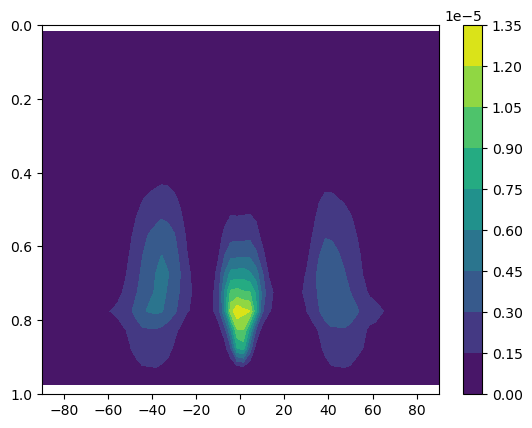

In [92]:
sigma_mean      = np.nanmean(p_origin[0]/ps_origin[0], axis=(0,3))
sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
y               = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)


plt.figure()
CS = plt.contourf(yy, sigma_mean2, np.nanmean(Prec_all[0], axis=(0,3)), levels=11)
plt.colorbar(CS)
plt.ylim([1,0])
### Chose 20S ~ 20N do mean precipitation
print(y[24:40])
prec_mean = np.nanmean(Prec_all[0], axis=(0,3))
# print(Prec_all.shape)

# final = np.dot(prec_mean[:,24:40], psi_w[:,24:40].T)
Prec_zm = np.nanmean(Prec_all[0], axis=3)
# psi_w_all
print(Prec_zm.shape)
print(psi_w_all.shape)
final = np.zeros(Prec_zm.shape[0])
for i in range(final.shape[0]):
    final[i] = (np.dot(np.reshape(Prec_zm[i], (20*64)),  np.reshape(psi_w_all[i], (20*64))))


Text(0.5, 0, 'day')

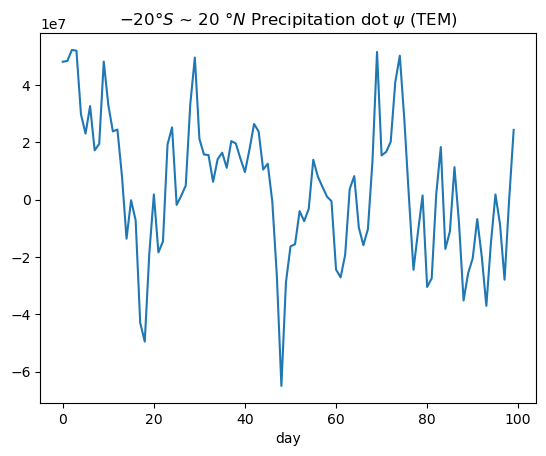

In [97]:
plt.figure()
plt.plot(final)
plt.title("$ -20 \degree S $ ~ 20 $\degree N$ Precipitation dot $\psi$ (TEM)")
plt.xlabel("day")


(20, 64)
-0.0020791499968449687


(1.0, 0.0)

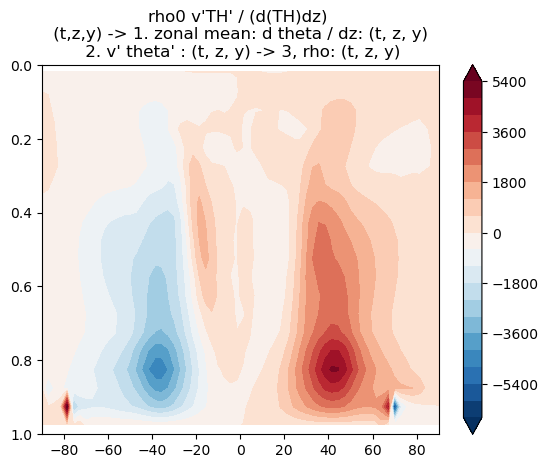

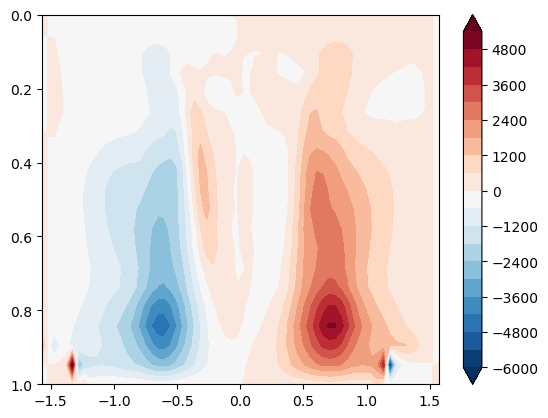

In [1778]:
# wTEM_tempdphi_new = np.where(wTEM_tempdphi<20000, wTEM_tempdphi,np.nan)
# wTEM_tempdphi_new2 = np.where(wTEM_tempdphi_new>-20000, wTEM_tempdphi_new,np.nan)

print(vTEM_temp.shape)

plt.figure()
# plt.contourf(yy, sigma_mean2, np.nanmean(wTEM1, axis=(0)),levels=11, cmap="RdBu_r", extend="both")
plt.contourf(yy, sigma_mean2,   wTEM_temp,levels=21, cmap="RdBu_r", extend="both")


plt.ylim([1,0])
plt.colorbar()

plt.title("rho0 v'TH' / (d(TH)dz) \n (t,z,y) -> 1. zonal mean: d theta / dz: (t, z, y) \n 2. v' theta' : (t, z, y) -> 3, rho: (t, z, y)")
    
if THETAz.any() < 0.:
    print("hi")
print(THETAz.min())

y_66 = np.deg2rad(np.linspace(-90,90,66))
sigma_mean_onlyz_20 = np.linspace(0,1,20)

yy_66, sigma_mean20 = np.meshgrid(y_66, sigma_mean_onlyz_20)

plt.figure()
CS = plt.contourf(yy_66, sigma_mean20,   wTEM_temp_new, levels=21, cmap="RdBu_r", extend="both")
plt.colorbar(CS)

plt.ylim([1,0])

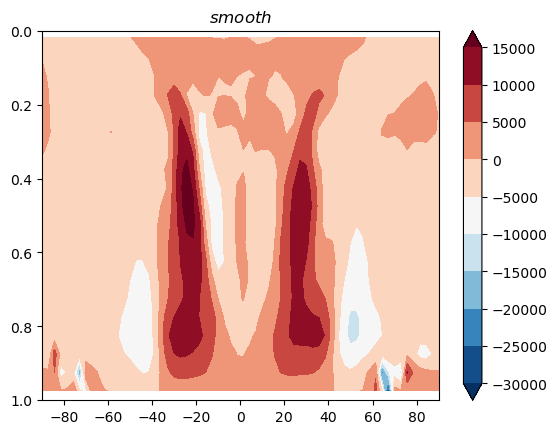

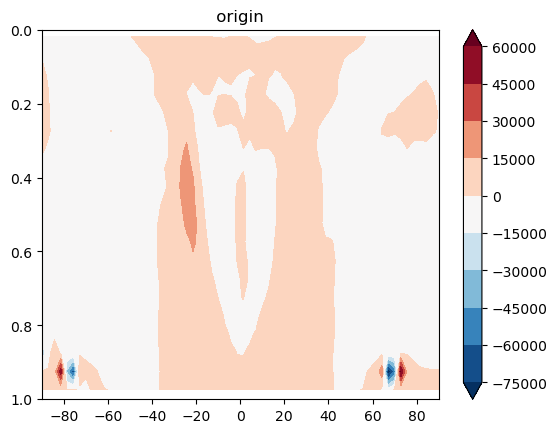

In [1779]:
plt.figure()
# plt.contourf(yy, sigma_mean2, np.nanmean(THETAz , axis=(0)),levels=11, cmap="RdBu_r", extend="both")
plt.contourf(yy, sigma_mean2,  wTEM_tempdphi_smooth ,levels=11, cmap="RdBu_r", extend="both")
plt.ylim([1,0])
plt.colorbar()
plt.title("$ smooth $")

plt.figure()
plt.contourf(yy, sigma_mean2,  wTEM_tempdphi ,levels=11, cmap="RdBu_r", extend="both")
plt.title(" origin ")
plt.ylim([1,0])
plt.colorbar()


In [1780]:
idx = np.dstack(np.unravel_index(np.argsort(acphi.ravel()), acphi.shape))
print(idx.shape)
print(acphi[idx[0,-1:,0], idx[0,-1:,1]])

idx = np.dstack(np.unravel_index(np.argsort(wTEM_tempdphi_smooth.ravel()), wTEM_tempdphi_smooth.shape))
print(idx.shape)
print(wTEM_tempdphi_smooth[idx[0,-1:,0], idx[0,-1:,1]])

(1, 1280, 2)
[6369239.71014724]
(1, 1280, 2)
[17916.64498188]


(1.0, 0.0)

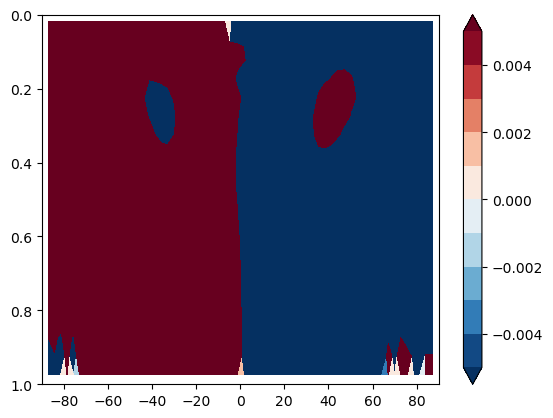

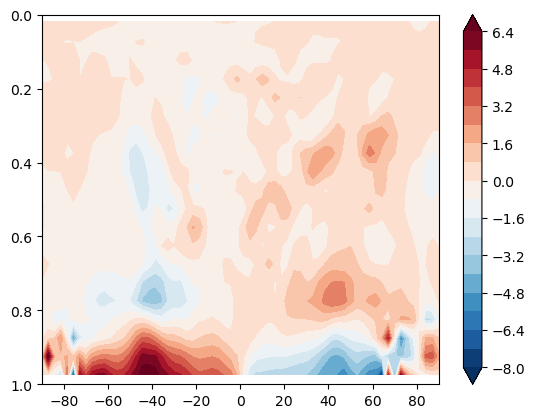

In [1953]:
plt.figure()
CS = plt.contourf(yy, sigma_mean2, wTEM, levels=np.linspace(-0.005,0.005,11), cmap="RdBu_r", extend="both")
plt.colorbar(CS)
plt.ylim([1,0])

plt.figure()
CS = plt.contourf(yy, sigma_mean2, vTEM, levels=21, cmap="RdBu_r", extend="both")
plt.colorbar(CS)
plt.ylim([1,0])

In [1948]:
rho_0_mean = np.nanmean(rho_0, axis=(0,3))
for pr in range(0,10,10):
    # vTEM, wTEM,p, ps, Wzmtm, rho_0 = plot_V_W_50(pr)
    sigma_mean = np.nanmean(p/ps, axis=(0,3))
    sigma_onlyz = np.nanmean(sigma_mean, axis=1)
    y = np.linspace(-90,90,64)
    yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)
    ### residual circulation
    # phi
    a = 6.37122e6
    lat   = np.linspace(-90, 90, 64)
    phi = np.broadcast_to(np.deg2rad(lat).reshape(1,64),(20,64)) # Get latitude in radians
    cphi  = np.cos(phi) 
    acphi = a * cphi

    psi_w1 = Wzmtm #np.nanmean(w , axis=(0,3))
    psi_w2 = Wzmtm #np.nanmean(w , axis=(0,3))
    """
    psi_w1[:,0] = 0
    for ilat in range(1,63):        
        dlat = phi[:,ilat] - phi[:,ilat-1]       
        psi_w1[:,ilat] =  psi_w1[:,ilat-1] + (dlat * rho_0_mean[:,ilat] * acphi[:,ilat] * wTEM[:,ilat])

    psi_w2[:,64-1] = 0
    for jlat in range(1,64-1):        
        ilat = 64 - 1 - jlat
        dlat = phi[:,ilat] - phi[:,ilat+1]           
        psi_w2[:,ilat] =  psi_w2[:,ilat+1] + (dlat * rho_0_mean[:,ilat] * acphi[:,ilat] * wTEM[:,ilat])
    psi_w = 0.5*(psi_w1 + psi_w2)
    
    
    """
    p_mean = np.nanmean(p_origin[0], axis=(0,3)) 
    psi_w1[0,:] = 0
    g = 9.81
    for ilev in range(1,19):        
        dlev = p_mean[ilev+1,:] - p_mean[ilev-1,:]       
        psi_w1[ilev,:] =  psi_w1[ilev-1,:] - 2*np.pi/g*acphi[ilev,:] * (dlev  * vTEM[ilev,:])
    psi_w = psi_w1
    
    
    

In [1955]:
print(np.nanmax(wTEM))
print(np.nanmin(wTEM))
p_origin.shape
print(vTEM.shape)

396990418577.82184
-406182586497.39404
(20, 64)


In [1950]:
print(psi_w.max()/10**9)
print(psi_w.min()/10**9)



534.2071356595281
-356.13962104810173


Text(0.5, 1.0, 'TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)')

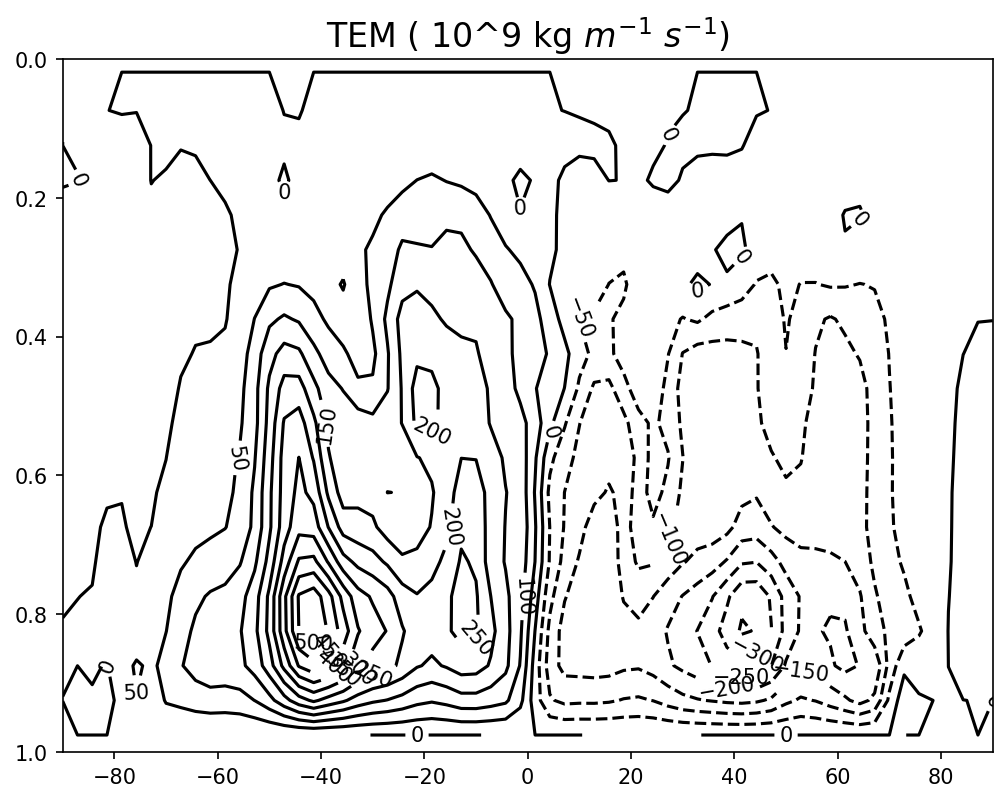

In [1951]:
plt.figure(figsize=(8,6), dpi=150.)
CS = plt.contour(yy,sigma_mean2, psi_w / 10**9, levels=21, colors='k') # 
plt.clabel(CS)
plt.ylim([1,0])
plt.title("TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)", fontsize=16)

(1.0, 0.0)

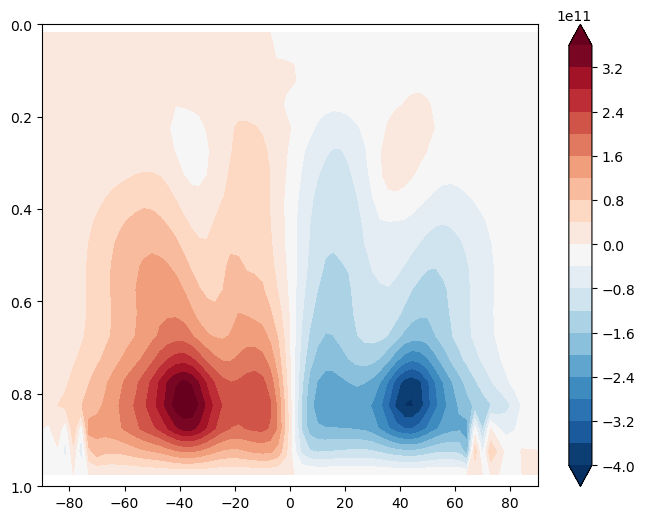

In [1759]:

plt.figure(figsize=(8,6), dpi=100.)
CS = plt.contourf(yy,sigma_mean2, psi_w , levels=21, cmap="RdBu_r", extend="both") # 
# plt.clabel(CS)

plt.colorbar(CS)
plt.ylim([1,0])

In [1533]:
print(np.nanmax(psi_w))
print(np.nanmin(psi_w))
vTEM.shape

16106539141.147812
-16527275329.835234


(20, 64)

### EMF convergence and zonal U wind

In [113]:
a = 0
Vzm = np.nanmean(v[a], axis=3)
Uzm = np.nanmean(u[a], axis=3)

Vza     = np.zeros(u.shape)
Uza     = np.zeros(u.shape)

for i in range(0,128):
    Vza[a,:,:,:,i]     = v[a,:,:,:,i] - Vzm
    Uza[a,:,:,:,i]     = u[a,:,:,:,i] - Uzm

In [54]:
Uza.shape

(6, 9500, 20, 64, 128)

In [25]:
y  = np.linspace(-90,90,64)
yd = np.deg2rad(y)
cy = np.cos(yd)
cy [0] = np.nan
cy [-1] = np.nan

In [61]:
M = Uza * Vza
Mzm = np.nanmean(M[a], axis=(3))
# for i in range(Mzm.shape[1]):
#     for j in range(Mzm.shape[2]):
#         Mzm[a,i,j,:] = cy[:]**0.5 * Mzm[a,i,j,:]

In [62]:
Mzm.shape

(9500, 20, 64)

In [63]:
dmdy = np.zeros(((np.shape(u)[1],20,64)))
r = 6371e3
for i in range(1,64-1):
    dmdy[:,:,i] = -(Mzm[:,:,i+1] - Mzm[:,:,i-1]) / (r * (yd[i+1] - yd[i-1]))
dmdy[:,:, 0] = -(Mzm[:,:, 1] - Mzm[:,:, 0]) / (r*(yd[ 1] - yd[ 0]))
dmdy[:,:,-1] = -(Mzm[:,:,-1] - Mzm[:,:,-2]) / (r*(yd[-1] - yd[-2]))
print(dmdy.shape)

(9500, 20, 64)


Text(0.5, 1.0, "500-10000 day Shading:$d\\overline{u'v'} / dy$, Contour: zonal U")

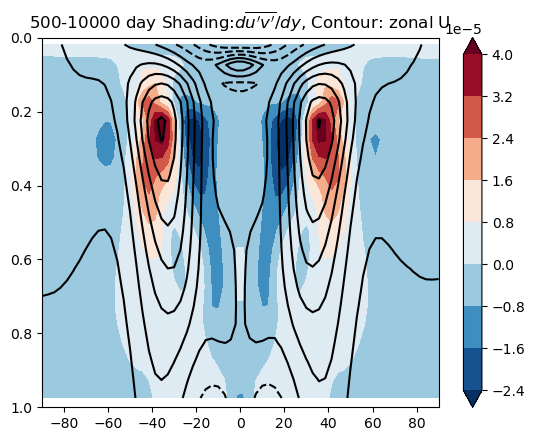

In [66]:
a = 0
check_days_length = int(end - start)

sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
y               = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)



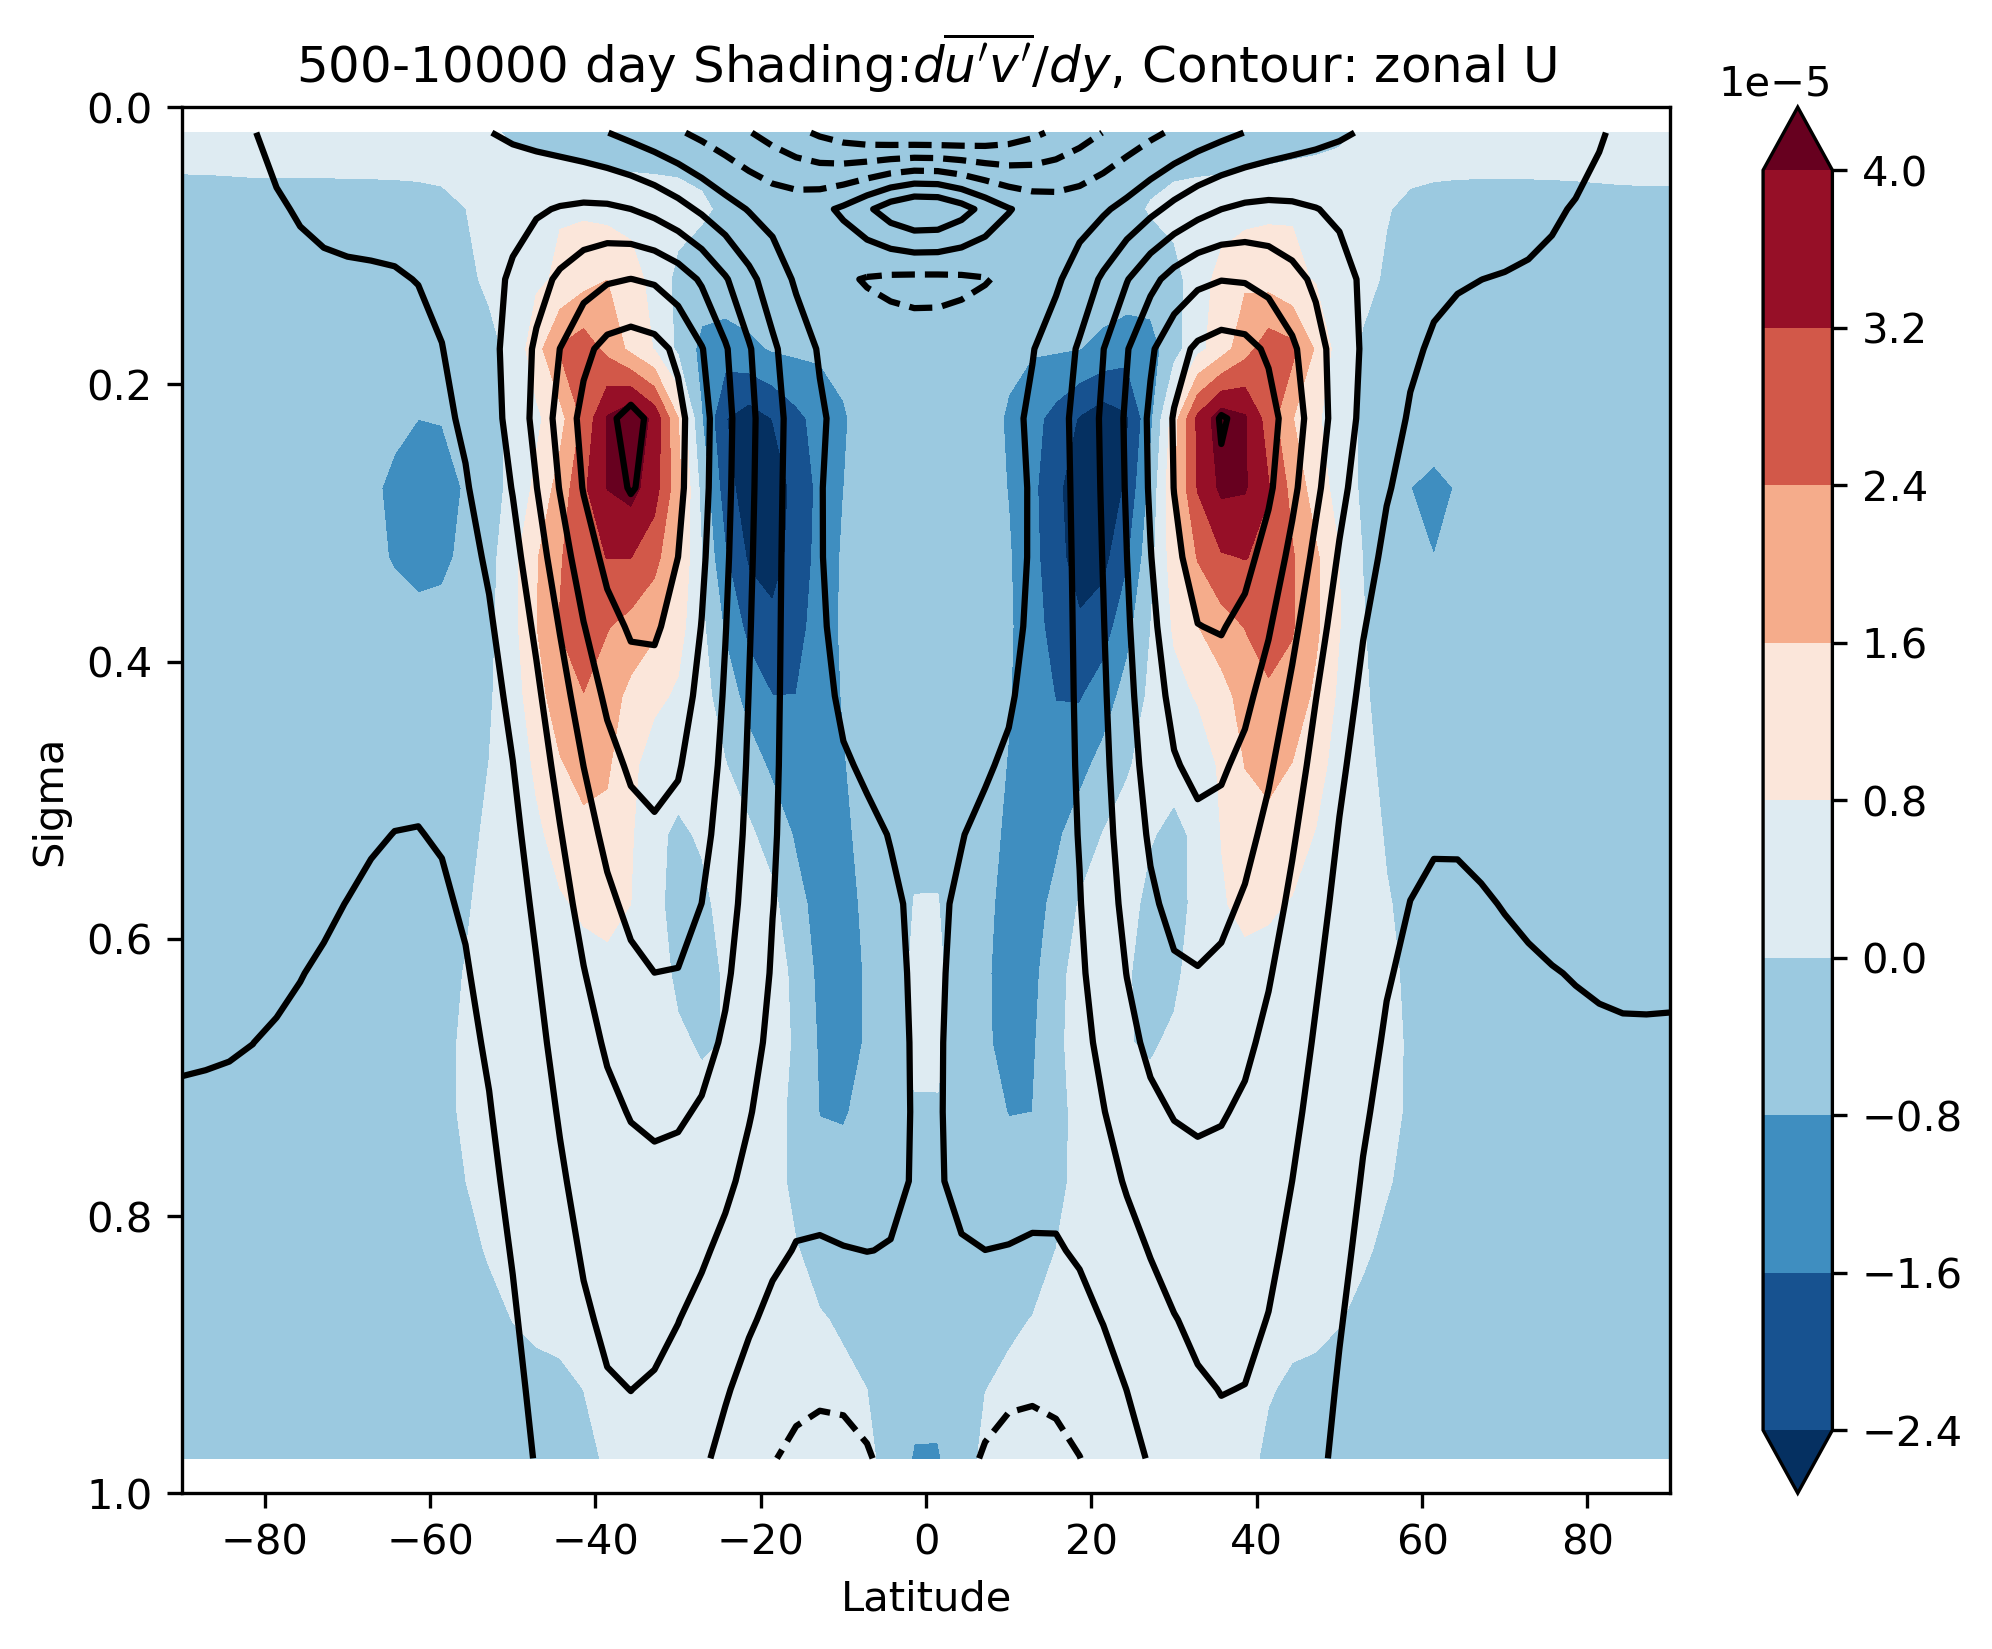

In [76]:
plt.figure(figsize=(8,6), dpi=300.)
CS = plt.contourf(yy, sigma_mean2,  np.nanmean(dmdy, axis=0), levels= 11, cmap="RdBu_r", extend="both")
plt.contour(yy, sigma_mean2,  np.nanmean(u[a], axis=(0,3)), levels= 11, colors='k')

plt.ylim([1,0])
plt.colorbar(CS)
plt.ylabel("Sigma")
plt.xlabel("Latitude")

plt.title("500-10000 day Shading:$d\overline{u'v'} / dy$, Contour: zonal U", )
plt.savefig("paper1_fig/EMF_U.png", dpi=600., bbox_inches="tight")
# plt.savefig("paper1_fig/EMF_U_black.png", facecolor='black', dpi=600., bbox_inches="tight")

plt.show()

In [95]:
M = Uza * Vza
# Mzm = np.nanmean(M[a], axis=(3))
# for i in range(Mzm.shape[0]):
#     for j in range(Mzm.shape[1]):
#         Mzm[i,j,:] = cy[:]**0.5 * Mzm[i,j,:]

(1.0, 0.0)

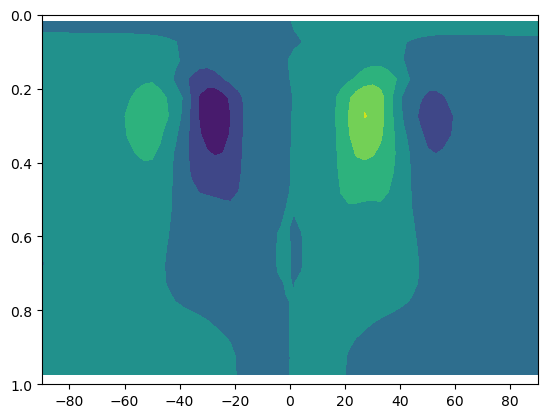

In [93]:
plt.figure()
plt.contourf(yy, sigma_mean2, np.mean(Vza[a]* Uza[a], axis=(0,3)))
plt.ylim([1,0])

In [102]:
M.shape

(6, 9500, 20, 64, 128)

Text(0.5, 1.0, "500-1600day $\\overline{u'v'}$")

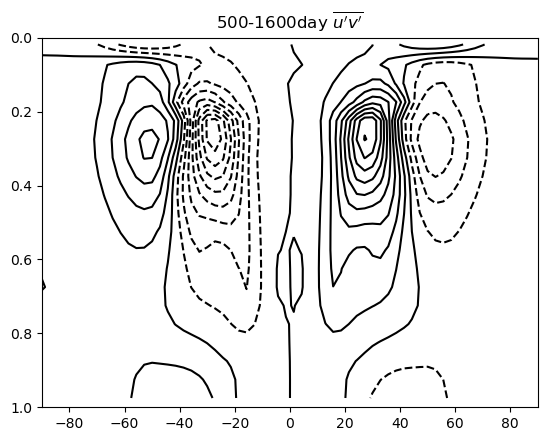

In [104]:

plt.figure()
plt.contour(yy, sigma_mean2,  np.nanmean(Vza[a]* Uza[a], axis=(0,3)), levels=21, colors="k", extend="both")
# CS = plt.contourf(yy, sigma_mean2,  np.nanmean(dmdy, axis=0), levels= 11, cmap="RdBu_r", extend="both")

plt.ylim([1,0])
plt.colorbar(CS)
plt.title("500-1600day $\overline{u'v'}$")

# Calculate EOF and PC

In [10]:
from EOF import EOF
def Cal_EOF_PC(input, latitude_range:str):
    """
    input:  input (day, 20, 32)

    latitude_range: 

    return: EOF   (20, 32)
            PC    (day,  )
    """
    day  = np.shape(input)[0]
    dim1 = np.shape(input)[1]
    dim2 = np.shape(input)[2]
    
    if latitude_range == "North hemisphere":
        yn = np.linspace(0,90,32)
    elif latitude_range == "South hemisphere":
        yn = np.linspace(-90,0,32)
    elif latitude_range == "Global":
        yn = np.linspace(-90,90,64)
        
    cyyn = np.cos(np.deg2rad(yn))

    input_weighted = np.zeros(input.shape)
    for i in range(np.shape(input)[0]): 
        for j in range(np.shape(input)[1]):
                input_weighted[i,j,:] = input[i,j,:] * (cyyn[:])**0.5
    
    input_reshape = np.reshape(input_weighted, (day,dim1*dim2))
    judge         = day - dim1*dim2
    
    if judge > 0:
        n_component = dim1*dim2
    else:
        n_component = day
        
    print("n_component:",n_component)
    
    single_EOF = EOF((input_reshape,), n_components=n_component, field="1D")
    single_EOF.get()
    
    # Step 3: PC / PC_std and EOF * PC_std
    PCs    = single_EOF.PC[0,:]
    PC2s   = single_EOF.PC[1,:]
    
    EOFs   = single_EOF.EOF[0,:]
    EOF2s  = single_EOF.EOF[1,:]
    
    PCs_std = PCs.std()
    PCs     = PCs / PCs_std

    PC2s_std = PC2s.std()
    PC2s     = PC2s / PC2s_std
    
    EOFs_std  = EOFs.std()
    EOFs      = EOFs * PCs_std

    EOF2s_std  = EOF2s.std()
    EOF2s      = EOF2s * PC2s_std
    
    # Step 4: reshape (1280,) back to (20,64)
    EOFs_zy  = np.reshape(EOFs,  (dim1,dim2))
    EOF2s_zy = np.reshape(EOF2s, (dim1,dim2))
    
    return EOFs_zy, PCs, EOF2s_zy, PC2s, single_EOF.explained

/tmp/ipykernel_2311755/2021305259.py:31: RuntimeWarning: invalid value encountered in divide
  sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
/tmp/ipykernel_2311755/2021305259.py:31: RuntimeWarning: Mean of empty slice
  sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
/tmp/ipykernel_2311755/2021305259.py:32: RuntimeWarning: Mean of empty slice
  sigma_onlyz     = np.nanmean(sigma_mean, axis=1)


KeyboardInterrupt: 

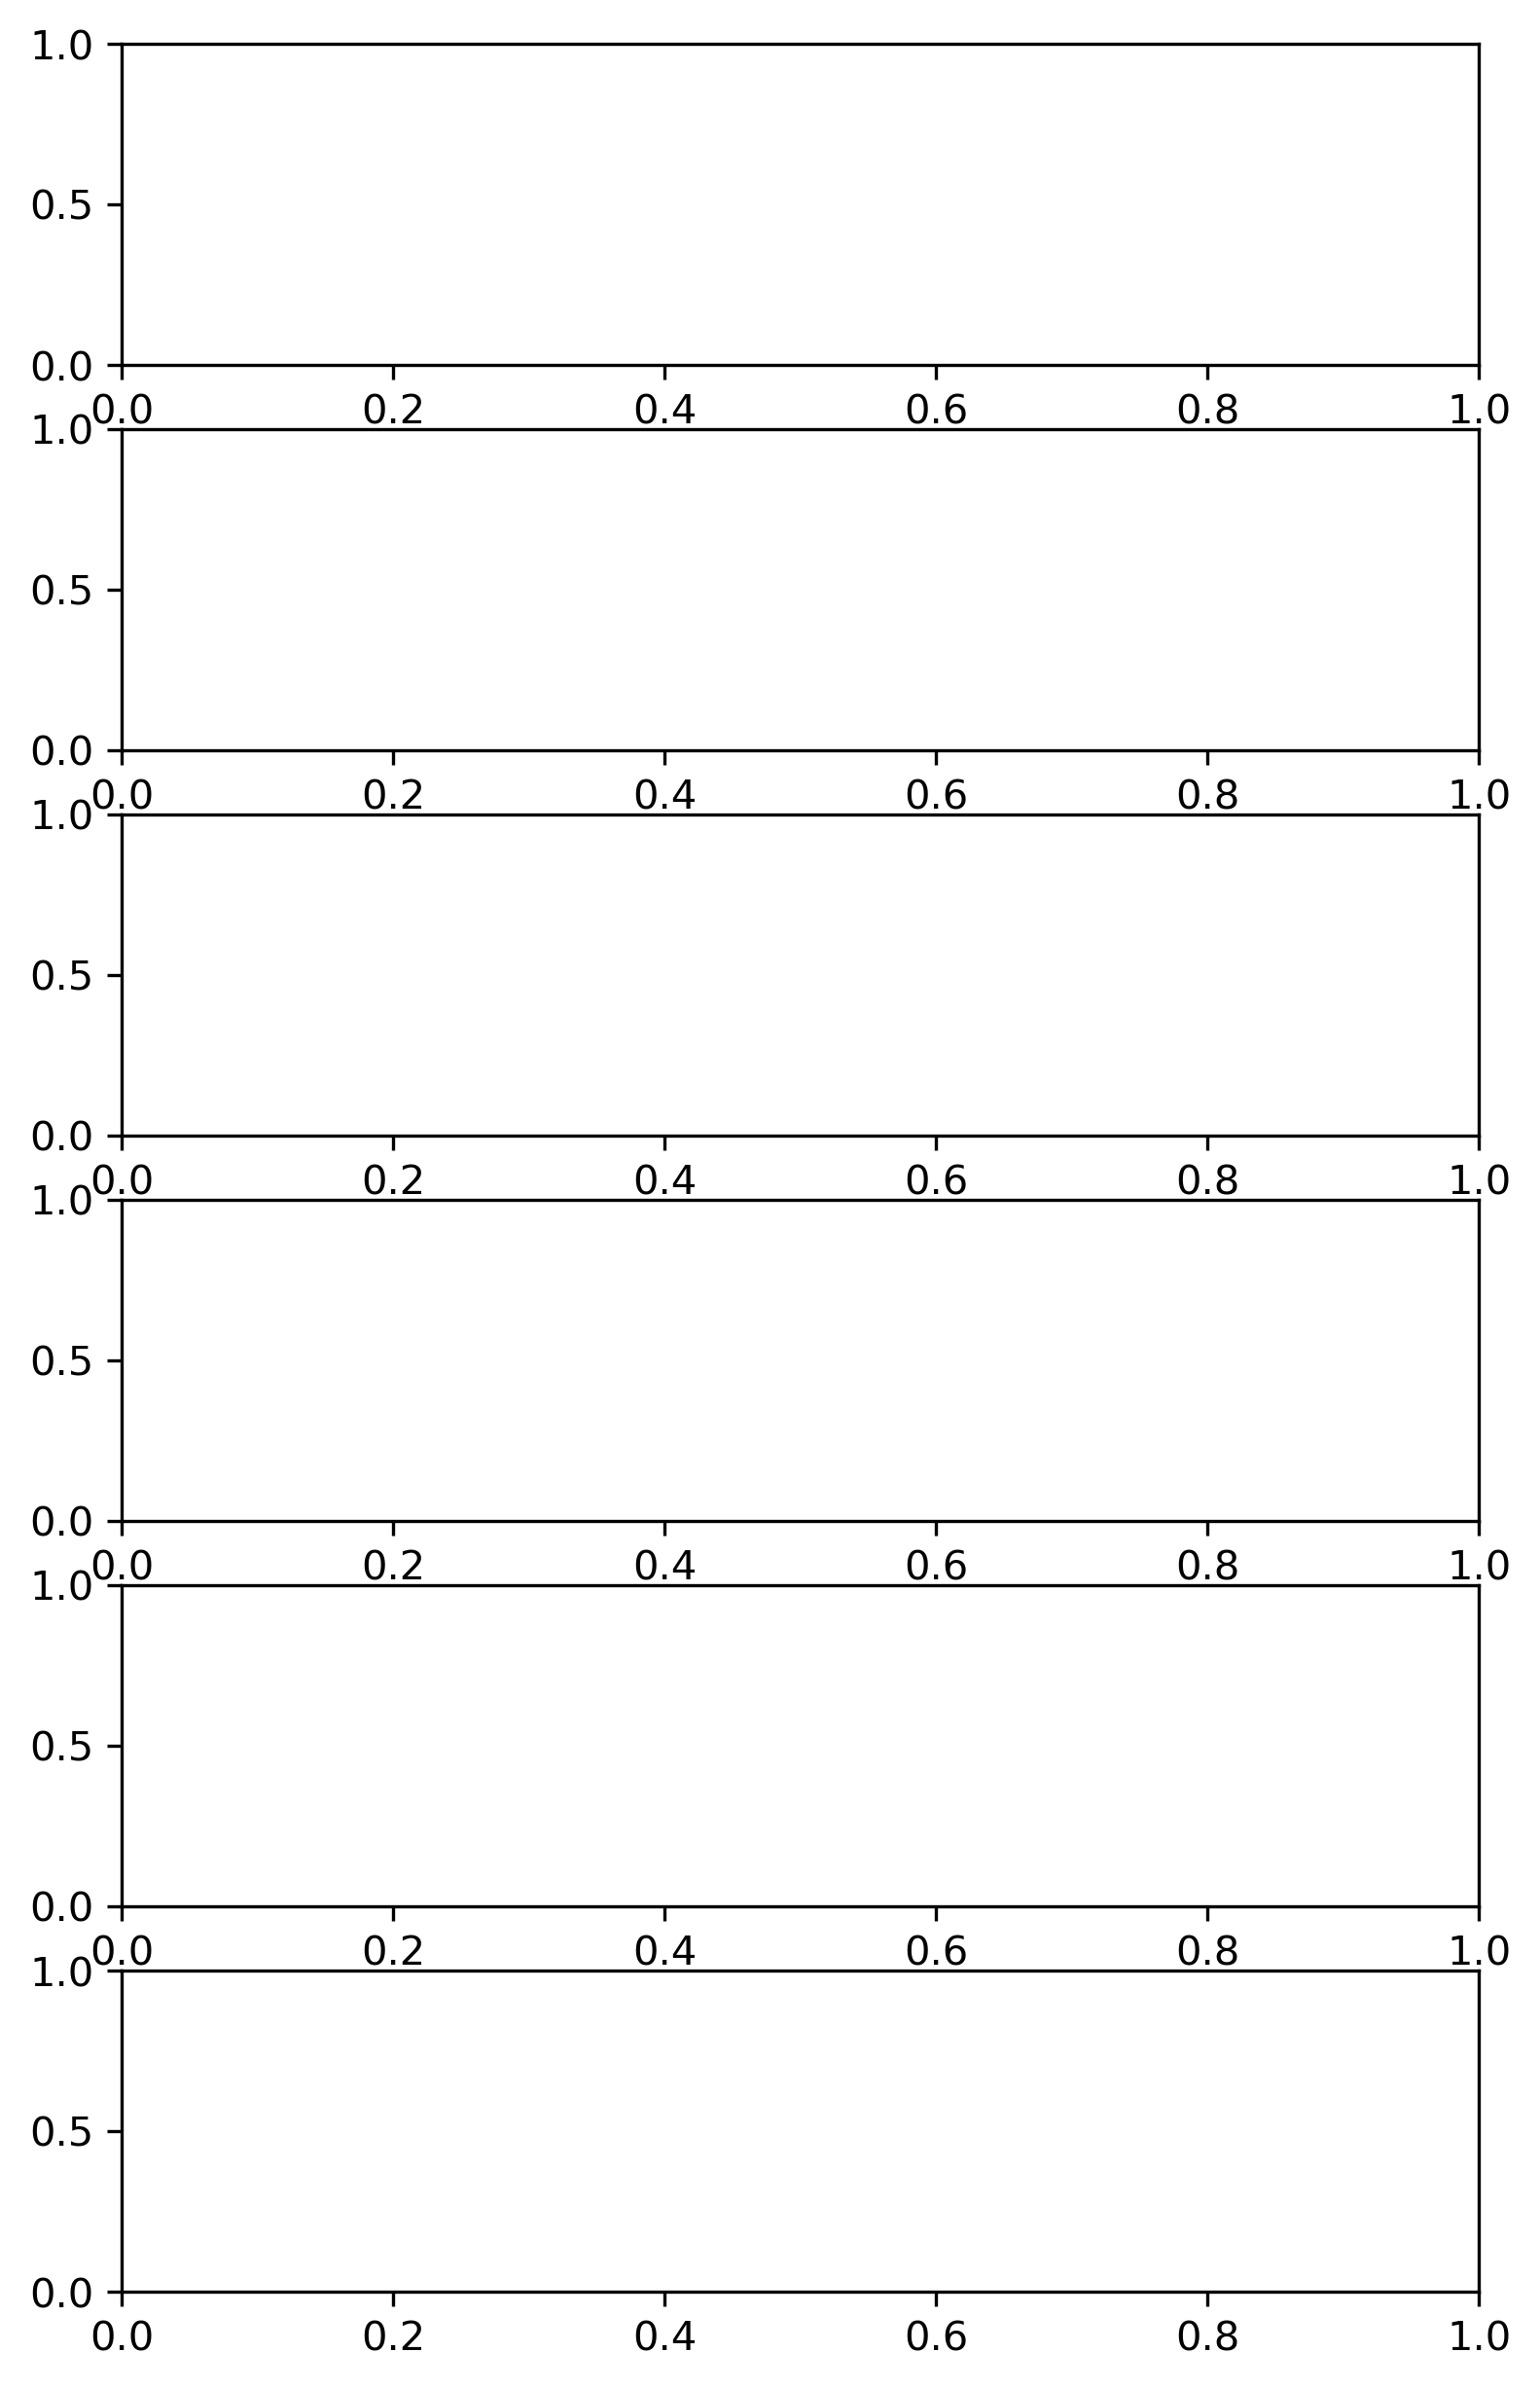

In [14]:
u  = u_origin
p  = p_origin
ps = ps_origin


fig,ax   = plt.subplots(int((pr_to - pr_start)/pr_leap),figsize=(6,10), dpi=300.)
check_days_length = int(end - start)

EOF1_all = np.zeros(((int(total_pr), 20, 32)))
EOF2_all = np.zeros(((int(total_pr), 20, 32)))

PC1_all = np.zeros((int(total_pr), total_day))
PC2_all = np.zeros((int(total_pr), total_day))


judge = total_day - (u.shape[2] * u.shape[3])/2
if judge >0:
    n_component = int((u.shape[2] * u.shape[3])/2)
else:
    n_component = total_day
explain_all = np.zeros((int(total_pr), n_component))

y  = np.linspace(-90,90,64)
yd = np.deg2rad(y)
cy = np.cos(yd)

y_nhalf = np.linspace(0,90,32)

a = 0
for pr in range(pr_start, pr_to, pr_leap):
    sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
    sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
    yy_nhalf, sigma_mean2_nhalf = np.meshgrid(y_nhalf,sigma_onlyz)
    
    u_nhalf = u[:,:,:,32:,:] 
    u_nhalf_w = np.zeros(u_nhalf.shape)
    for i in range(np.shape(u)[1]): 
        for j in range(np.shape(u)[2]):
            for k in range(np.shape(u)[4]):
                u_nhalf_w[a,i,j,:,k] = u_nhalf[a,i,j,:,k] * (cy[32:])**0.5
    u_zy = np.nanmean(u_nhalf_w[a,:,:,:,:], axis=(3))

    # Step 2: do EOF of u
    EOF1_all[a,:,:],PC1_all[a,:],EOF2_all[a,:,:],PC2_all[a,:], explain_all[a] =  Cal_EOF_PC(u_zy, "North hemisphere")
    
    # Step 3: plot
    CS = ax[a].contourf(yy_nhalf, sigma_mean2_nhalf, EOF1_all[a], levels=np.linspace(-4.5,4.5,21), cmap="bwr", extend="both")
    fig.colorbar(CS, ax=ax[a], extend="both")
    ax[a].set_ylim([1,0])
    ax[a].set_title(f"PR{pr} EOF [u]", fontsize=14)
    ax[a].set_ylabel("sigma")
    ax[-1].set_xlabel("latitude")

    CT = ax[a].contour(yy_nhalf, sigma_mean2_nhalf, np.nanmean(u[a,:,:,32:,:], axis=(0,3)), colors='k', levels=np.arange(-20,50,10))
    plt.clabel(CT)
    print(a)
    a += 1
    
fig.tight_layout()
# plt.savefig("check_U_EOF.png", dpi=300., bbox_inches='tight')
plt.show()

In [19]:
print(t_origin)

[[[[[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   ...

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0.

In [307]:
total_pr = int(total_pr)
boostrap_specific_level_check_05percentage = True
# boostrap_specific_level_check_1percentage  = False

if boostrap_specific_level_check_05percentage:
    if pr_leap == 10:
        y_pr0 = 37.565547707680246
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24744279208542716
        # z_biggest_all[1] = 0.24669235238693465
        z_biggest_all[1] = 0.24683398241206028
        # z_biggest_all[3] = 0.24307792085427135
        z_biggest_all[2] = 0.2400873586683417
        # z_biggest_all[5] = 0.23530527638190954
        z_biggest_all[3] = 0.22946374057788943
        # z_biggest_all[7] = 0.2208343907035176
        z_biggest_all[4] = 0.21615653266331658
        # z_biggest_all[9] = 0.2113334798994975
        z_biggest_all[5] = 0.20424703203517586

print(y_pr0)

37.565547707680246


## Original grid U -> EOF

In [215]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx
print(z_biggest_all)
# print(biggest_u_z_idx)

[0.24744279 0.24683398 0.24008736 0.22946374 0.21615653 0.20424703]


### using specific level

4 0
4 10
4 20
4 30
4 40
4 50


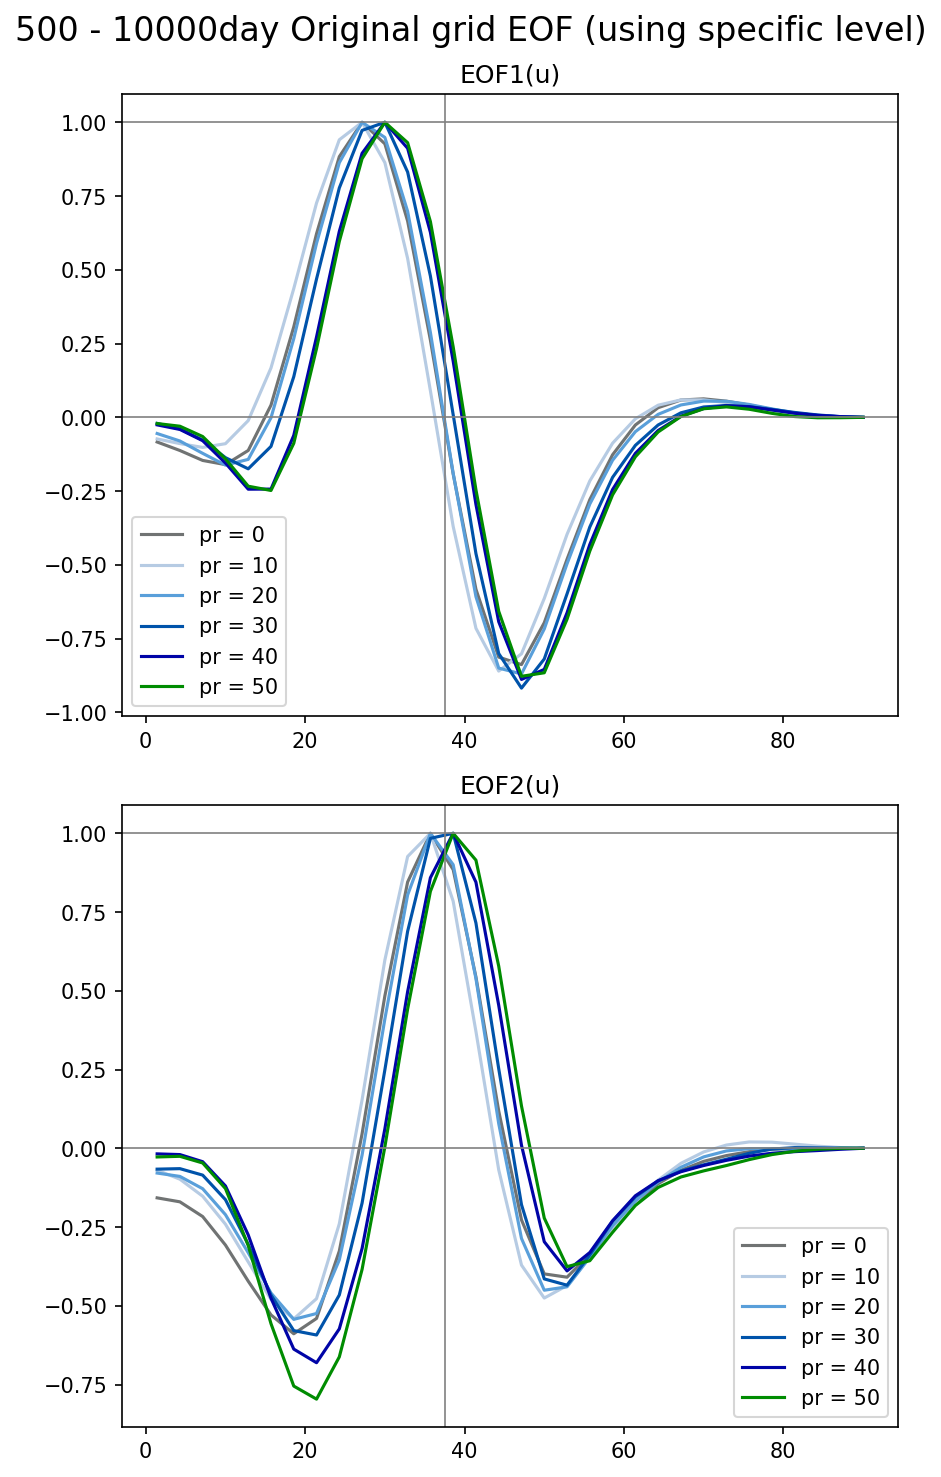

In [53]:
import matplotlib.colors as colors
import matplotlib as mpl

### for color
rgb   = ([112,115,115])
rgb   = np.array(rgb)/255.0
icmap = colors.ListedColormap(rgb,name='my_color')
cmap  = mpl.cm.viridis

cmap_color = icmap  
colors     = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255
########
yn = y[32:]

fig,ax = plt.subplots(2,figsize=(6,10),dpi=150.)
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    biggest_u_z, biggest_u_z_idx = find_nearest(sigma_onlyz, value=z_biggest_all[a])
    print(biggest_u_z_idx, pr)
    
    if pr == pr_start:
        control_0 = np.max(EOF1_all[a,biggest_u_z_idx, :])
        control_1 = np.max(-EOF2_all[a,biggest_u_z_idx, :])
        ax[0].plot(yn, (EOF1_all[a,biggest_u_z_idx, :]/ control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(EOF2_all[a,biggest_u_z_idx, :]/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])

    if pr == pr_start+pr_leap:
        control_0 = np.max(-EOF1_all[a,biggest_u_z_idx, :])
        control_1 = np.max(-EOF2_all[a,biggest_u_z_idx, :])
        ax[0].plot(yn, (-EOF1_all[a,biggest_u_z_idx, :]/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, (-EOF2_all[a,biggest_u_z_idx, :]/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap*2:
        control_0 = np.max(-EOF2_all[a,biggest_u_z_idx, :])
        control_1 = np.max(EOF1_all[a,biggest_u_z_idx, :])
        ax[0].plot(yn, (EOF1_all[a,biggest_u_z_idx, :]/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(EOF2_all[a,biggest_u_z_idx, :]/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap*3:
        control_0 = np.max(EOF1_all[a,biggest_u_z_idx, :])
        control_1 = np.max(-EOF2_all[a,biggest_u_z_idx, :])
        ax[0].plot(yn,  (EOF1_all[a,biggest_u_z_idx, :]/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(EOF2_all[a,biggest_u_z_idx, :]/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap*4:
        control_0 = np.max(-EOF1_all[a,biggest_u_z_idx, :])
        control_1 = np.max(-EOF2_all[a,biggest_u_z_idx, :])
        ax[0].plot(yn, -(EOF1_all[a,biggest_u_z_idx, :]/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(EOF2_all[a,biggest_u_z_idx, :]/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    
    if pr == pr_start+pr_leap*5:
        control_0 = np.max(-EOF1_all[a,biggest_u_z_idx, :])
        control_1 = np.max(-EOF2_all[a,biggest_u_z_idx, :])
        ax[0].plot(yn, -(EOF1_all[a,biggest_u_z_idx, :]/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(EOF2_all[a,biggest_u_z_idx, :]/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    a += 1
for a in range(2):
    ax[a].axvline(x=y_pr0, color='gray', lw=0.8)
    ax[a].axhline(y=0, color='gray', lw=0.8)
    ax[a].axhline(y=1, color='gray', lw=0.8)
    
    ax[a].legend()
    if a == 0:
        ax[a].set_title("EOF1(u)")
    elif a == 1:
        ax[a].set_title("EOF2(u)")
#############################################################################
plt.suptitle(f"{start} - {end}day Original grid EOF (using specific level)", fontsize=16)
plt.tight_layout()
# plt.savefig("Original grid EOF(using specific level).png", dpi=600., bbox_inches="tight")

plt.show()


### using all level integration

0.0
1.0
2.0
3.0
4.0
5.0


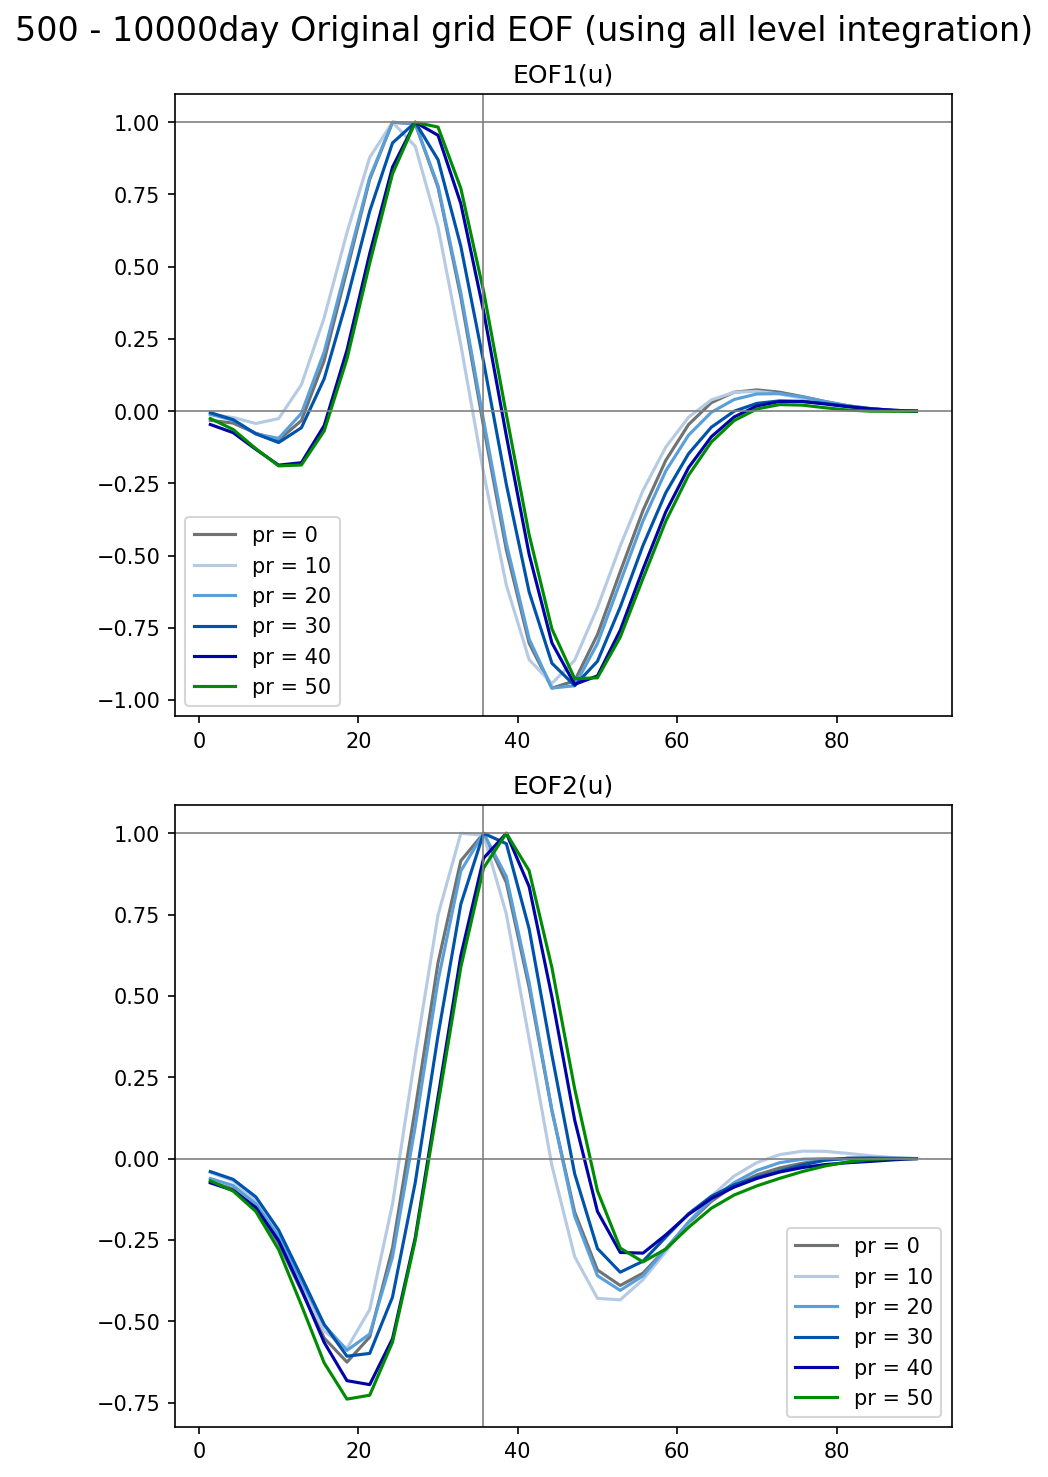

In [59]:
fig,ax = plt.subplots(2,figsize=(6,10),dpi=150.)
boostrap_vertical_average_check_05percentage = True
if boostrap_vertical_average_check_05percentage:
    y_pr0_vertical_average = 35.63125391849529
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    print(pr/pr_leap)

    if pr == pr_start:
        control_0 = np.max(np.nanmean(EOF1_all[a,:, :],  axis=0))
        control_1 = np.max(-np.nanmean(EOF2_all[a,:, :], axis=0))
        ax[0].plot(yn,  (np.nanmean(EOF1_all[a,:, :], axis=0)/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(np.nanmean(EOF2_all[a,:, :], axis=0)/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap:
        control_0 = np.max(-np.nanmean(EOF1_all[a,:, :], axis=0))
        control_1 = np.max(-np.nanmean(EOF2_all[a,:, :], axis=0))
        ax[0].plot(yn, -(np.nanmean(EOF1_all[a,:, :], axis=0)/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(np.nanmean(EOF2_all[a,:, :], axis=0)/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap*2:
        control_0 = np.max(np.nanmean(EOF1_all[a,:, :], axis=0))
        control_1 = np.max(-np.nanmean(EOF2_all[a,:, :], axis=0))
        ax[0].plot(yn,  (np.nanmean(EOF1_all[a,:, :], axis=0)/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(np.nanmean(EOF2_all[a,:, :], axis=0)/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap*3:
        control_0 = np.max(np.nanmean(EOF1_all[a,:, :], axis=0))
        control_1 = np.max(-np.nanmean(EOF2_all[a,:, :], axis=0))
        ax[0].plot(yn,  (np.nanmean(EOF1_all[a,:, :], axis=0)/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(np.nanmean(EOF2_all[a,:, :], axis=0)/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])

    if pr == pr_start+pr_leap*4:
        control_0 = np.max(-np.nanmean(EOF1_all[a,:, :], axis=0))
        control_1 = np.max(-np.nanmean(EOF2_all[a,:, :], axis=0))
        ax[0].plot(yn, -(np.nanmean(EOF1_all[a,:, :], axis=0)/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(np.nanmean(EOF2_all[a,:, :], axis=0)/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        
    if pr == pr_start+pr_leap*5:
        control_0 = np.max(-np.nanmean(EOF1_all[a,:, :], axis=0))
        control_1 = np.max(-np.nanmean(EOF2_all[a,:, :], axis=0))
        ax[0].plot(yn, -(np.nanmean(EOF1_all[a,:, :], axis=0)/control_0), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
        ax[1].plot(yn, -(np.nanmean(EOF2_all[a,:, :], axis=0)/control_1), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    
    a += 1

for a in range(2):
    ax[a].axvline(x=y_pr0_vertical_average, color='gray', lw=0.8)
    ax[a].axhline(y=0, color='gray', lw=0.8)
    ax[a].axhline(y=1, color='gray', lw=0.8)
    
    ax[a].legend()
    if a == 0:
        ax[a].set_title("EOF1(u)")
    elif a == 1:
        ax[a].set_title("EOF2(u)")
        
plt.suptitle(f"{start} - {end}day Original grid EOF (using all level integration)", fontsize=16)

plt.tight_layout()
# plt.savefig("Original grid EOF(using all level integration).png", dpi=600., bbox_inches="tight")
plt.show()


### EOF -> interpolation

In [ ]:
do_interpolation_then_EOF = True
interpolation_times = 10

if do_interpolation_then_EOF:
    u_zy_thin    = np.zeros(((u_zy.shape[0], 20*interpolation_times, 32*interpolation_times)))
    yys          = np.linspace(0,90,32*interpolation_times)
    sigma_mean2s = np.linspace(0,1,20*interpolation_times)
    
    EOF1_all = np.zeros(((total_pr, u_zy.shape[1], u_zy.shape[2])))
    PC1_all  = np.zeros((total_pr , u_zy.shape[0]))
    
    EOF2_all = np.zeros(((total_pr, u_zy.shape[1], u_zy.shape[2])))
    PC2_all  = np.zeros((total_pr , u_zy.shape[0]))


    EOF1_all_thin = np.zeros(((total_pr, u_zy.shape[1]*interpolation_times, u_zy.shape[2]*interpolation_times)))
    EOF2_all_thin = np.zeros(((total_pr, u_zy.shape[1]*interpolation_times, u_zy.shape[2]*interpolation_times)))
    
    a = 0
    for pr in range(pr_start, pr_to, pr_leap):
        u_zy = np.nanmean(u[a,:,:,32:,:], axis=3)

            
        EOF1_all[a], PC1_all[a], EOF2_all[a], PC2_all[a] = Cal_EOF_PC(EOF, u_zy, a, total_pr)

        interp_spline = RectBivariateSpline(sigma_onlyz, y[32:], EOF1_all[a])
        EOF1_all_thin[a,:,:] = interp_spline(sigma_mean2s, yys)

        interp_spline = RectBivariateSpline(sigma_onlyz, y[32:], EOF2_all[a])
        EOF2_all_thin[a,:,:] = interp_spline(sigma_mean2s, yys)
        # print(a)
        a += 1
    print("done")





In [ ]:
fig,ax = plt.subplots(2,figsize=(6,10),dpi=300.)
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    print(biggest_u_z_idx, pr)
    
    if pr ==0:
        control = np.max(EOF1_all_thin[a,biggest_u_z_idx, :])
        ax[0].plot(yys, (EOF1_all_thin[a,biggest_u_z_idx, :]/ control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 10:
        control = np.max(-EOF1_all_thin[a,biggest_u_z_idx, :])
        ax[0].plot(yys, -(EOF1_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 20:
        control = np.max(EOF1_all_thin[a,biggest_u_z_idx, :])
        ax[0].plot(yys, (EOF1_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==30:
        control = np.max(EOF1_all_thin[a,biggest_u_z_idx, :])
        ax[0].plot(yys, (EOF1_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==40:
        control = np.max(-EOF1_all_thin[a,biggest_u_z_idx, :])
        ax[0].plot(yys, -(EOF1_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==50:
        control = np.max(-EOF1_all_thin[a,biggest_u_z_idx, :])
        ax[0].plot(yys, -(EOF1_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    # print(control)
    # plt.plot(y[:], EOF1_all[a,5, :], label=f"pr = {a*pr_leap}")
    
    a += 1
ax[0].axvline(x=y_pr0, color='gray', lw=0.8)
ax[0].axhline(y=0, color='gray', lw=0.8)
ax[0].axhline(y=1, color='gray', lw=0.8)

ax[0].legend()
ax[0].set_title("EOF1(u)")
#############################################################################
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    # print(pr/pr_leap)
    # print(biggest_u_z_idx, pr)
    
    # if pr == 10:    
        # plt.plot(yys, EOF1_all_thin[biggest_u_z_idx, :], label=f"pr = {a*pr_leap}")
    # else:
    # plt.plot(yys, EOF1_all_thin[biggest_u_z_idx, :], label=f"pr = {a*pr_leap}")
    if pr ==0:
        control = np.max(-EOF2_all_thin[a,biggest_u_z_idx, :])
        ax[1].plot(yys, -(EOF2_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 10:
        control = np.max(-EOF2_all_thin[a,biggest_u_z_idx, :])
        ax[1].plot(yys, -(EOF2_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 20:
        control = np.max(-EOF2_all_thin[a,biggest_u_z_idx, :])
        ax[1].plot(yys, -(EOF2_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])

    if pr ==30:
        control = np.max(-EOF2_all_thin[a,biggest_u_z_idx, :])
        ax[1].plot(yys, -(EOF2_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==40:
        control = np.max(-EOF2_all_thin[a,biggest_u_z_idx, :])
        ax[1].plot(yys, -(EOF2_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==50:
        control = np.max(-EOF2_all_thin[a,biggest_u_z_idx, :])
        ax[1].plot(yys, -(EOF2_all_thin[a,biggest_u_z_idx, :]/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    
    # plt.plot(y[:], EOF1_all[a,5, :], label=f"pr = {a*pr_leap}")
    
    a += 1
ax[1].axvline(x=y_pr0, color='gray', lw=0.8)
ax[1].axhline(y=1, color='gray', lw=0.8)
ax[1].axhline(y=0, color='gray', lw=0.8)
ax[1].legend()
ax[1].set_title("EOF2(u)")

plt.suptitle(f"{start}-{end} day EOF (using specific level) -> interpolation", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
fig,ax = plt.subplots(2,figsize=(6,10),dpi=300.)
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    print(biggest_u_z_idx, pr)
    
    if pr ==0:
        control = np.max(np.nanmean(EOF1_all_thin[a,:, :], axis=0))
        ax[0].plot(yys, (np.nanmean(EOF1_all_thin[a,:, :], axis=0)/ control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 10:
        control = np.max(-np.nanmean(EOF1_all_thin[a,:, :], axis=0))
        ax[0].plot(yys, -(np.nanmean(EOF1_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 20:
        control = np.max(np.nanmean(EOF1_all_thin[a,:, :], axis=0))
        ax[0].plot(yys, (np.nanmean(EOF1_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==30:
        control = np.max(np.nanmean(EOF1_all_thin[a,:, :], axis=0))
        ax[0].plot(yys, (np.nanmean(EOF1_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==40:
        control = np.max(-np.nanmean(EOF1_all_thin[a,:, :], axis=0))
        ax[0].plot(yys, -(np.nanmean(EOF1_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==50:
        control = np.max(-np.nanmean(EOF1_all_thin[a,:, :], axis=0))
        ax[0].plot(yys, -(np.nanmean(EOF1_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    # print(control)
    # plt.plot(y[:], EOF1_all[a,5, :], label=f"pr = {a*pr_leap}")
    
    a += 1
ax[0].axvline(x=y_pr0, color='gray', lw=0.8)
ax[0].axhline(y=0, color='gray', lw=0.8)
ax[0].axhline(y=1, color='gray', lw=0.8)

ax[0].legend()
ax[0].set_title("EOF1(u)")
#############################################################################
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    # print(pr/pr_leap)
    # print(biggest_u_z_idx, pr)
    
    # if pr == 10:    
        # plt.plot(yys, EOF1_all_thin[biggest_u_z_idx, :], label=f"pr = {a*pr_leap}")
    # else:
    # plt.plot(yys, EOF1_all_thin[biggest_u_z_idx, :], label=f"pr = {a*pr_leap}")
    if pr ==0:
        control = np.max(-np.nanmean(EOF2_all_thin[a,:, :], axis=0))
        ax[1].plot(yys, -(np.nanmean(EOF2_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 10:
        control = np.max(-np.nanmean(EOF2_all_thin[a,:, :], axis=0))
        ax[1].plot(yys, -(np.nanmean(EOF2_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr == 20:
        control = np.max(-np.nanmean(EOF2_all_thin[a,:, :], axis=0))
        ax[1].plot(yys, -(np.nanmean(EOF2_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])

    if pr ==30:
        control = np.max(-np.nanmean(EOF2_all_thin[a,:, :], axis=0))
        ax[1].plot(yys, -(np.nanmean(EOF2_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==40:
        control = np.max(-np.nanmean(EOF2_all_thin[a,:, :], axis=0))
        ax[1].plot(yys, -(np.nanmean(EOF2_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    if pr ==50:
        control = np.max(-np.nanmean(EOF2_all_thin[a,:, :], axis=0))
        ax[1].plot(yys, -(np.nanmean(EOF2_all_thin[a,:, :], axis=0)/control), label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    
    # plt.plot(y[:], EOF1_all[a,5, :], label=f"pr = {a*pr_leap}")
    
    a += 1
ax[1].axvline(x=y_pr0_vertical_average, color='gray', lw=0.8)
ax[1].axhline(y=1, color='gray', lw=0.8)
ax[1].axhline(y=0, color='gray', lw=0.8)
ax[1].legend()
ax[1].set_title("EOF2(u)")

plt.suptitle(f"{start}-{end} day EOF (using all levels integration) -> interpolation", fontsize=16)
plt.tight_layout()
plt.show()


# u -> EOF, PC -> autocorrelation

### explained

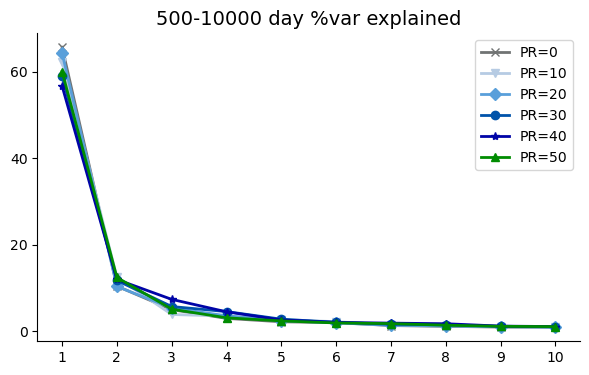

In [62]:
xxx = np.arange(1,11,1)
fig,ax = plt.subplots(figsize=(7,4), dpi=100)
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    if pr == pr_start:
        ax.plot(xxx, explain_all[a,:10]*100, "-x", color=colors[int(pr/pr_leap)], lw=2, label="PR=0")
    if pr == pr_start+pr_leap:
        ax.plot(xxx, explain_all[a,:10]*100, "-", color=colors[int(pr/pr_leap)], lw=2, marker='v', label="PR=10")
    if pr == pr_start+pr_leap*2:
        ax.plot(xxx, explain_all[a,:10]*100, "-D", color=colors[int(pr/pr_leap)], lw=2, label="PR=20")
    if pr == pr_start+pr_leap*3:
        ax.plot(xxx, explain_all[a,:10]*100, "-o", color=colors[int(pr/pr_leap)], lw=2, label="PR=30")
    if pr == pr_start+pr_leap*4:
        ax.plot(xxx, explain_all[a,:10]*100, "-*", color=colors[int(pr/pr_leap)], lw=2, label="PR=40")
    if pr == pr_start+pr_leap*5:
        ax.plot(xxx, explain_all[a,:10]*100, "-^", color=colors[int(pr/pr_leap)], lw=2, label="PR=50")
    a += 1
# plt.grid()
plt.title(f"{start}-{end} day %var explained", fontsize=14)
plt.xticks(np.arange(1,11,1))
plt.yticks(np.arange(0,80,20))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()
# plt.savefig("%var explained.png", dpi=600., bbox_inches="tight")


### Check EOF

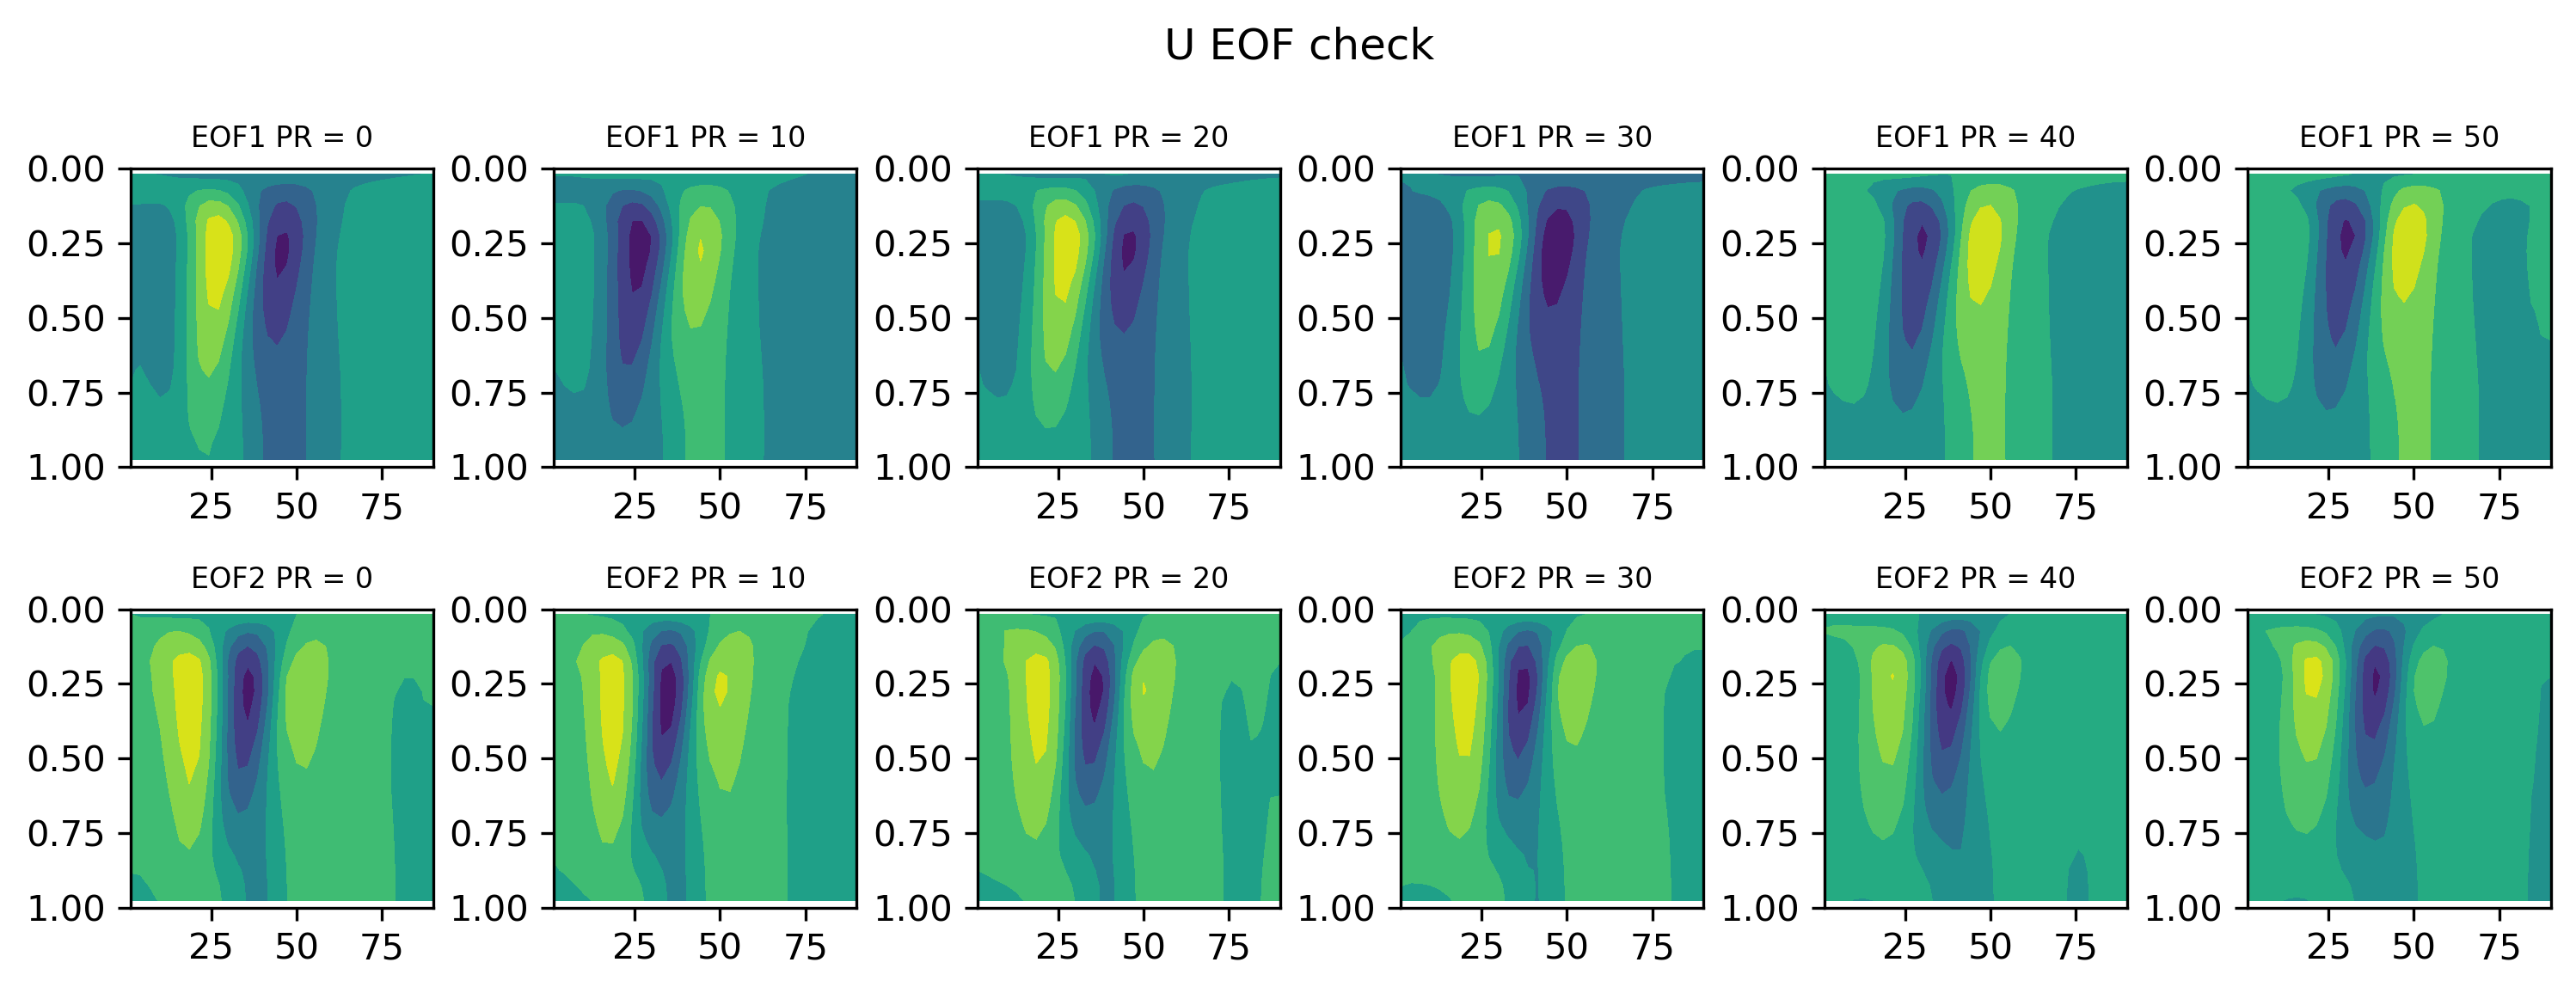

In [64]:
fig, ax = plt.subplots(2,6, figsize=(10,4), dpi=300.)
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
    sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
    y               = np.linspace(-90,90,64)
    yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)

    ax[0,a].contourf(yy[:,32:], sigma_mean2[:,32:], EOF1_all[a])
    ax[0,a].set_ylim([1,0])
    ax[0,a].set_title(f"EOF1 PR = {pr}", fontsize=8)

    ax[1,a].contourf(yy[:,32:], sigma_mean2[:,32:], EOF2_all[a])
    ax[1,a].set_ylim([1,0])
    ax[1,a].set_title(f"EOF2 PR = {pr}", fontsize=8)
    a+=1
plt.suptitle("U EOF check")
fig.tight_layout(rect=[0, 0.03, 1, 0.999])
# plt.tight_layout()
plt.show()

### autocorrelation

In [308]:
def autocorr(x,lags):
    
    corr = np.zeros(int(lags))
    for l in range(lags):
        if l == 0:
            corr[l] = 1.
        else:
            corr[l] = np.corrcoef(x[l:],x[:-l])[0][1]
    return np.array(corr)

In [309]:
auto_length = 100
auto_all = np.zeros(( total_pr, auto_length))

In [310]:
auto_length = 100
PC1_auto_0 = autocorr(PC1_all[0,:], auto_length) 
PC1_auto_1 = autocorr(PC1_all[1,:], auto_length) 
PC1_auto_2 = autocorr(PC1_all[2,:], auto_length) 
PC1_auto_3 = autocorr(PC1_all[3,:], auto_length) 
PC1_auto_4 = autocorr(PC1_all[4,:], auto_length) 
PC1_auto_5 = autocorr(PC1_all[5,:], auto_length) 

PC2_auto_0 = autocorr(PC2_all[0,:], auto_length) 
PC2_auto_1 = autocorr(PC2_all[1,:], auto_length) 
PC2_auto_2 = autocorr(PC2_all[2,:], auto_length) 
PC2_auto_3 = autocorr(PC2_all[3,:], auto_length) 
PC2_auto_4 = autocorr(PC2_all[4,:], auto_length) 
PC2_auto_5 = autocorr(PC2_all[5,:], auto_length) 

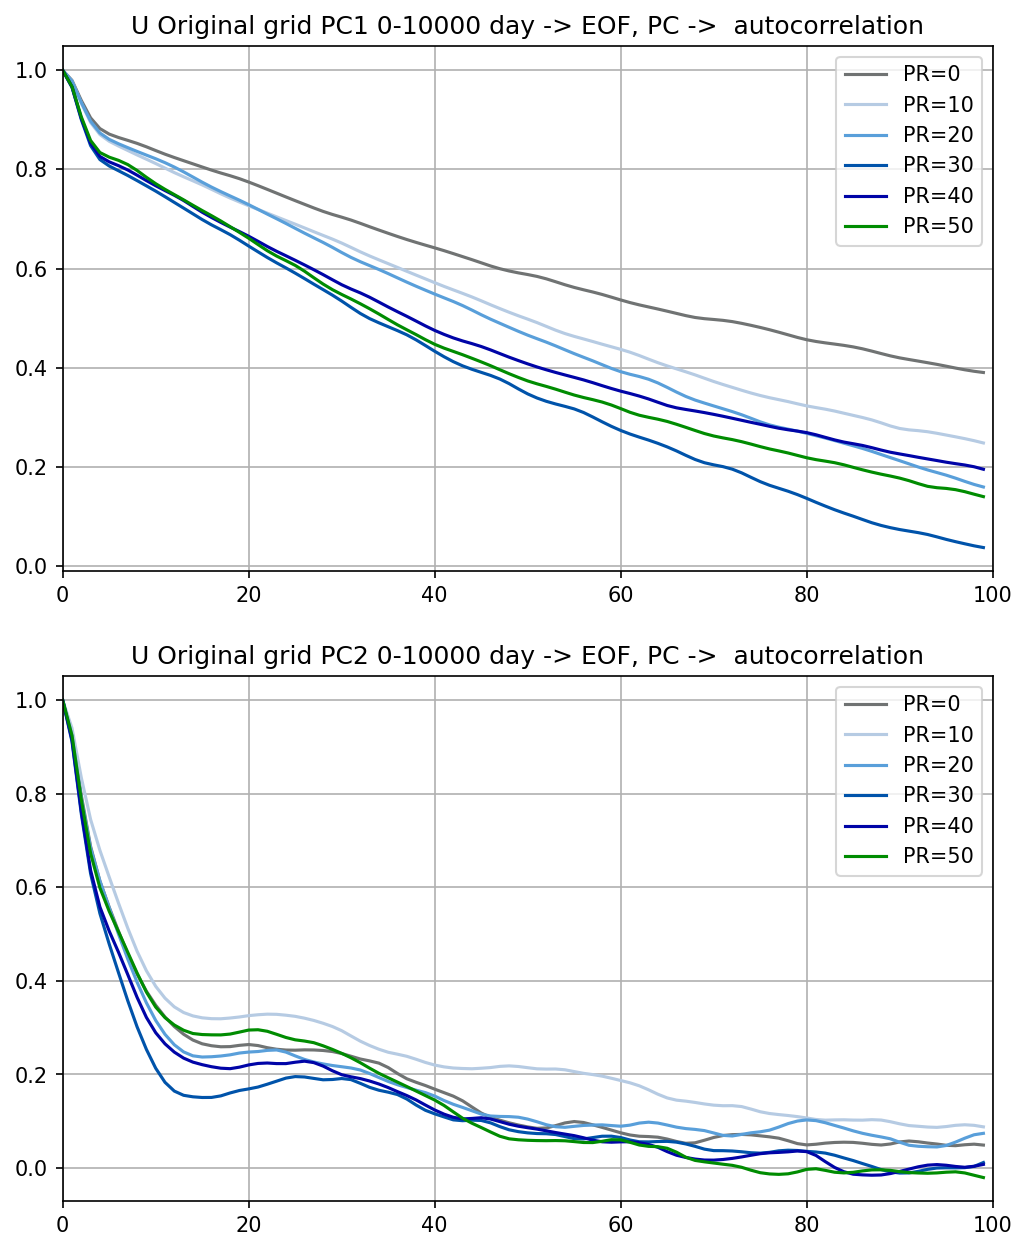

In [311]:
tau = np.arange(0,auto_length,1)

fig, ax = plt.subplots(2,figsize=(8,10),dpi=150)
ax[0].plot(tau, PC1_auto_0 , label=f"PR={pr_start}", color=colors[0])
ax[0].plot(tau, PC1_auto_1, label=f"PR={pr_start+pr_leap}", color=colors[1])
ax[0].plot(tau, PC1_auto_2, label=f"PR={pr_start+pr_leap*2}", color=colors[2])
ax[0].plot(tau, PC1_auto_3, label=f"PR={pr_start+pr_leap*3}", color=colors[3])
ax[0].plot(tau, PC1_auto_4, label=f"PR={pr_start+pr_leap*4}", color=colors[4])
ax[0].plot(tau, PC1_auto_5, label=f"PR={pr_start+pr_leap*5}", color=colors[5])
ax[0].legend()
ax[0].set_xlim([0,auto_length])
# ax[0].set_title("Original grid PC1 500-2900 day -> EOF, PC ->  autocorrelation")
ax[0].set_title(f"U Original grid PC1 {start}-{end} day -> EOF, PC ->  autocorrelation")
ax[0].grid()
###############################################################

ax[1].plot(tau, PC2_auto_0 , label=f"PR={pr_start}", color=colors[0])
ax[1].plot(tau, PC2_auto_1, label=f"PR={pr_start+pr_leap}", color=colors[1])
ax[1].plot(tau, PC2_auto_2, label=f"PR={pr_start+pr_leap*2}", color=colors[2])
ax[1].plot(tau, PC2_auto_3, label=f"PR={pr_start+pr_leap*3}", color=colors[3])
ax[1].plot(tau, PC2_auto_4, label=f"PR={pr_start+pr_leap*4}", color=colors[4])
ax[1].plot(tau, PC2_auto_5, label=f"PR={pr_start+pr_leap*5}", color=colors[5])
ax[1].legend()
ax[1].set_xlim([0,auto_length])
# ax[1].set_title("Original grid PC2 500-2900 day -> EOF, PC ->  autocorrelation")
ax[1].set_title(f"U Original grid PC2 {start}-{end} day -> EOF, PC ->  autocorrelation")

ax[1].grid()
# plt.savefig("Autocorrelation original grid PC12(500 - 10000 day).png", dpi=600., bbox_inches="tight")
plt.show()

# Calculate PDF then do statistical test (to determine which day start)

### Effective of degree of freedom

In [312]:
def cal_self_Martin_et_al_1999(window_length, r1):
    """
    T : window length
    r1: lag one autocorrelation of data1
    """
    final = window_length * ( (1-r1[1]) / (1+r1[1]) )
    return final

def cal_array_dof_Martin_et_al_1999(T, r1):
    """
    T : window length
    r1: lag one autocorrelation of data1
    r2: lag one autocorrelation of data2
    """
    final = np.zeros(T)
    a = 0
    for i in range(T, 0, -1):
        final[a] = i * ( (1-r1[1]) / (1+r1[1]) )
        a += 1
    return final

In [313]:
from scipy import stats
import math
def run_t_test(data1, data2, dof1, dof2):
    
    # mean
    data1_mean, data2_mean = np.nanmean(data1), np.nanmean(data2)
    # standard deviation
    data1_sd, data2_sd = np.std(data1), np.std(data2)

    # std^2 / dof
    std_dof = ( ((data1_sd**2) / dof1) + ((data2_sd**2) / dof2) )**0.5

    # t-stat
    t_stat = (data1_mean - data2_mean) / ( std_dof )

    # std error
    std_error1 =  data1_sd / np.sqrt(dof1)
    std_error2 =  data2_sd / np.sqrt(dof2)
    
    # critical value
    alpha = 0.1
    lower_cv1 =  stats.t.ppf(alpha/2      , dof2) #* std_error1
    high_cv1  =  stats.t.ppf(1.0 - alpha/2, dof2) #* std_error1
    # print(lower_cv1)

    # lower_cv1 =  data1_mean - 1.96 * data1_sd / dof1**0.5 
    # high_cv1  =  data1_mean + 1.96 * data1_sd / dof1**0.5 
    
    
    # t_test, _ = stats.ttest_rel(data1, data2)
    
    return t_stat, lower_cv1, high_cv1, _

In [314]:
window_length = 200
auto_length = 2

a = 0

### all 9500 day do overlap window 
# PC1_window     = np.zeros((( u.shape[0], int(u.shape[1]/window_length), window_length )))
# overlap version
PC1_window      = np.zeros((( u.shape[0], int(u.shape[1]-window_length), window_length )))

test_stat_all   = np.zeros(( u.shape[0], PC1_window.shape[1]))
pvalue_all      = np.zeros(( u.shape[0], PC1_window.shape[1]))
cv_all          = np.zeros(( u.shape[0], PC1_window.shape[1]))

dof             = np.zeros(( u.shape[0], int(u.shape[1]-window_length)  ))
window_day_auto = np.zeros((( u.shape[0], int(u.shape[1]-window_length), auto_length )))

for pr in range(pr_start, pr_to, pr_leap):
    k = 0
    for i in range(0, u.shape[1]-window_length):
        # Step 1. Divide PC1 into 100 day window, so I got 9500/100 = 95 windows
        PC1_window[a,k,:] = (PC1_all[a,i:i+window_length])
        k += 1

    # Step 2. cal autocorrelation
    last_window_day_auto         = autocorr(PC1_window[a,-1,:], auto_length)
    for i in range(PC1_window.shape[1]):
        window_day_auto[a,i,:]   = autocorr(PC1_window[a,i,:], auto_length) 

        # Step 3. cal dof (degree of freedom)
        dof[a,i]          = cal_self_Martin_et_al_1999(window_length, window_day_auto[a,i,:])
        
    # print(test_stat)
    
    a += 1

In [315]:
a = 0
PC1_2000_auto = np.zeros(( u.shape[0], auto_length ))
for pr in range(pr_start, pr_to, pr_leap):
    PC1_2000_auto[a,:]   = autocorr(PC1_all[a,-2000:], auto_length)
    a += 1

In [316]:
dof_2000 = np.zeros( u.shape[0] )
a = 0
for pr in range(pr_start, pr_to, pr_leap):
    dof_2000[a] = cal_self_Martin_et_al_1999(window_length, PC1_2000_auto[a,:])
    a += 1

In [317]:
t_score_all = np.zeros(( u.shape[0], int(u.shape[1]-window_length) ))
t_test_all  = np.zeros(( u.shape[0], int(u.shape[1]-window_length) ))

cv_low_all  = np.zeros(( u.shape[0], int(u.shape[1]-window_length) ))
cv_high_all = np.zeros(( u.shape[0], int(u.shape[1]-window_length) ))

a = 0
for pr in range(pr_start, pr_to, pr_leap):
    for i in range(PC1_window.shape[1]):
        ####################### PC1_window
        t_score, low_cv, high_cv, _ = run_t_test(PC1_all[a,-2000:], PC1_window[a,i,:], dof_2000[a], dof[a,i])
        # print(t_score)
        # print(cv)
        
        t_score_all[a,i] = t_score
        # t_test_all[a,i]  = t_test
        cv_low_all[a,i]  = low_cv
        cv_high_all[a,i] = high_cv
        
        # print(i)
    a += 1

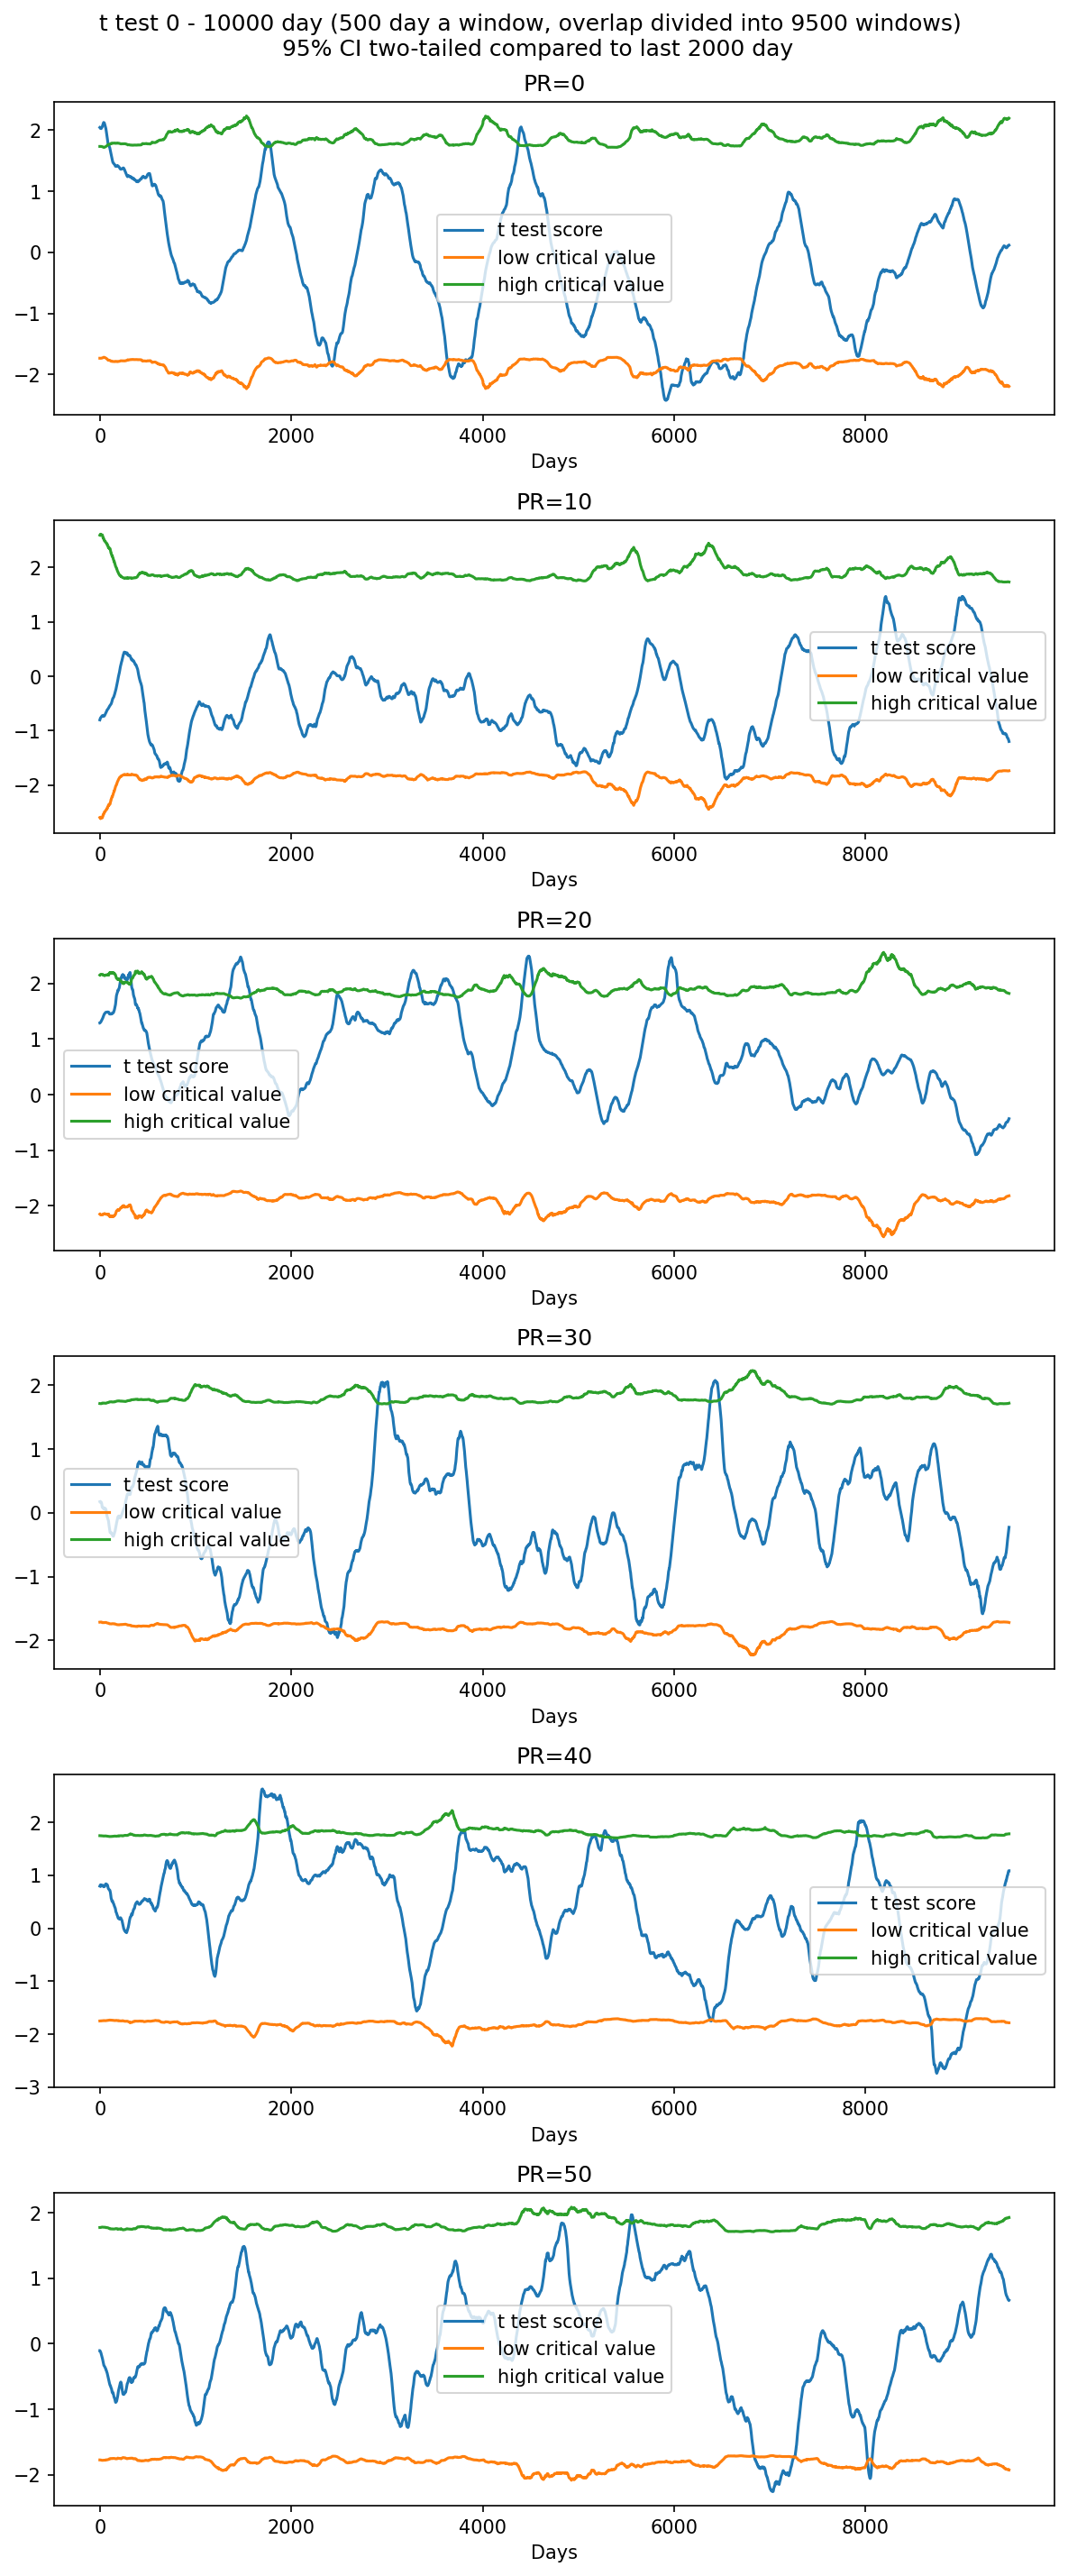

In [318]:
a = 0
fig, ax = plt.subplots(u.shape[0], figsize=(8,20), dpi=150.)
for pr in range(pr_start, pr_to, pr_leap):

    ax[a].plot(t_score_all[a, :], label="t test score")
    # plt.plot(t_test_all[a, ], label="t test score")
    
    ax[a].plot(cv_low_all[a] , label="low critical value")
    ax[a].plot(cv_high_all[a], label="high critical value")
    
    ax[a].set_title(f"PR={a*10}")
    ax[a].set_xlabel("Days")
    ax[a].legend()
    a += 1
plt.suptitle(f"t test 0 - 10000 day ({window_length} day a window, overlap divided into {10000-window_length} windows) \n 95% CI two-tailed compared to last 2000 day")
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
# plt.savefig("t_test.png", dpi=600., bbox_inches="tight")
plt.show()

In [160]:
dof.shape

(6, 9500)

## cal autocorrelation error bar

In [161]:
"""
Step 1. Cal dof (degree of freedom) with equation Martin et al. 1999:
        with whole length of PC1 (NOT need to divide)
        N* = N * ( (1-r) / (1+r) )
        N = 9500, when tau = 0
        N = 9499, when tau = 1 
        .
        .
        .
       
Step 2. cal autocorrelation of whole length of PC1

Step 3. with autocorrelation and dof => cal error bar each tau
"""

'\nStep 1. Cal dof (degree of freedom) with equation Martin et al. 1999:\n        with whole length of PC1 (NOT need to divide)\n        N* = N * ( (1-r) / (1+r) )\n        N = 9500, when tau = 0\n        N = 9499, when tau = 1 \n        .\n        .\n        .\n       \nStep 2. cal autocorrelation of whole length of PC1\n\nStep 3. with autocorrelation and dof => cal error bar each tau\n'

In [182]:
int(start)

0

In [195]:
dof0_whole = cal_array_dof_Martin_et_al_1999(int(end-start), PC1_all[0,start:])
dof1_whole = cal_array_dof_Martin_et_al_1999(int(end-start), PC1_all[1,start:])
dof2_whole = cal_array_dof_Martin_et_al_1999(int(end-start), PC1_all[2,start:])
dof3_whole = cal_array_dof_Martin_et_al_1999(int(end-start), PC1_all[3,start:])
dof4_whole = cal_array_dof_Martin_et_al_1999(int(end-start), PC1_all[4,start:])
dof5_whole = cal_array_dof_Martin_et_al_1999(int(end-start), PC1_all[5,start:])



In [196]:
tau_whole = np.linspace(0,9500,9500)
yyy0_thin_whole  = autocorr(PC1_all[0], 9500)
yyy1_thin_whole = autocorr(PC1_all[1], 9500)
yyy2_thin_whole = autocorr(PC1_all[2], 9500)
yyy3_thin_whole = autocorr(PC1_all[3], 9500)
yyy4_thin_whole = autocorr(PC1_all[4], 9500)
yyy5_thin_whole = autocorr(PC1_all[5], 9500)



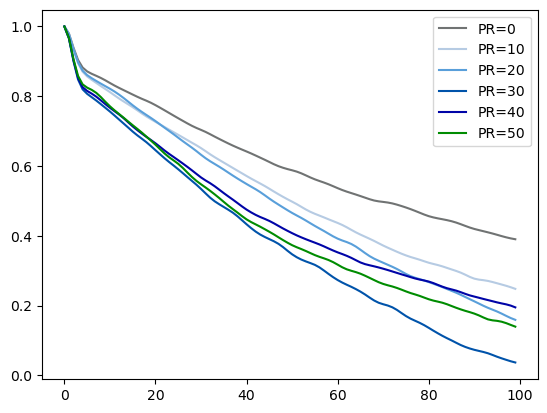

In [201]:
plt.figure()
plt.plot(tau_whole[:100], yyy0_thin_whole[:100], color=colors[0], label="PR=0")
plt.plot(tau_whole[:100], yyy1_thin_whole[:100], color=colors[1], label="PR=10")
plt.plot(tau_whole[:100], yyy2_thin_whole[:100], color=colors[2], label="PR=20")
plt.plot(tau_whole[:100], yyy3_thin_whole[:100], color=colors[3], label="PR=30")
plt.plot(tau_whole[:100], yyy4_thin_whole[:100], color=colors[4], label="PR=40")
plt.plot(tau_whole[:100], yyy5_thin_whole[:100], color=colors[5], label="PR=50")

plt.legend()

In [194]:
yerror_all.shape

(100,)

(100,)


Text(0.5, 1.0, 'Autocorrelation error bar')

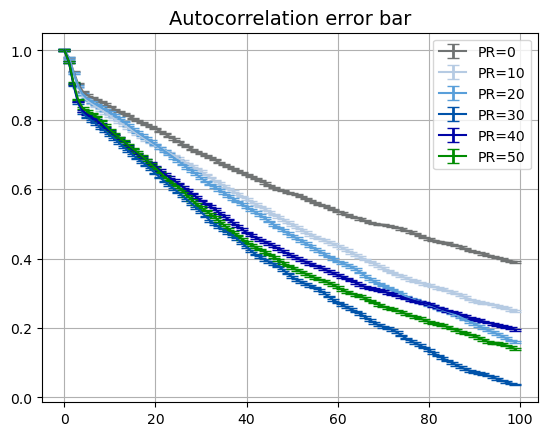

In [206]:
# plt.plot(tau_whole, yyy_thin_whole)
std1 = np.nanstd(yyy_thin_whole[:100], ddof=1)
yerror0_all  = np.nanstd(yyy0_thin_whole[:100]) / np.sqrt(dof0_whole[:100])
yerror1_all = np.nanstd(yyy1_thin_whole[:100]) / np.sqrt(dof1_whole[:100])
yerror2_all = np.nanstd(yyy2_thin_whole[:100]) / np.sqrt(dof2_whole[:100])
yerror3_all = np.nanstd(yyy3_thin_whole[:100]) / np.sqrt(dof3_whole[:100])
yerror4_all = np.nanstd(yyy4_thin_whole[:100]) / np.sqrt(dof4_whole[:100])

yerror5_all = np.nanstd(yyy5_thin_whole[:100]) / np.sqrt(dof5_whole[:100])


print(yerror_all.shape)
plt.errorbar(tau_whole[:100], yyy0_thin_whole[:100], yerr=yerror_all, capsize=4, elinewidth=2, color=colors[0], label="PR=0")
plt.errorbar(tau_whole[:100], yyy1_thin_whole[:100], yerr=yerror2_all, capsize=4, elinewidth=2, color=colors[1], label="PR=10")
plt.errorbar(tau_whole[:100], yyy2_thin_whole[:100], yerr=yerror2_all, capsize=4, elinewidth=2, color=colors[2], label="PR=20")
plt.errorbar(tau_whole[:100], yyy3_thin_whole[:100], yerr=yerror2_all, capsize=4, elinewidth=2, color=colors[3], label="PR=30")
plt.errorbar(tau_whole[:100], yyy4_thin_whole[:100], yerr=yerror2_all, capsize=4, elinewidth=2, color=colors[4], label="PR=40")
plt.errorbar(tau_whole[:100], yyy5_thin_whole[:100], yerr=yerror2_all, capsize=4, elinewidth=2, color=colors[5], label="PR=50")
plt.grid()
plt.legend()

plt.title("Autocorrelation error bar", fontsize=14)